<a href="https://colab.research.google.com/github/andreslill/lfb-response-time-dashboard/blob/main/analysis/London_Fire_Brigade_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**London Fire Brigade: Incident & Response Time Analysis**
---------------------------------------------------------------------------

## **Data Loading & Initial Inspection**

### Load All Datasets


---------------------------------------------------------------------------

In [ ]:
# Install and import gdown for downloading files from Google Drive

!pip install -U gdown
import gdown

In [ ]:
# Download all project datasets from Google Drive
# XLSX files were pre-converted to CSV for much faster processing in Google Colab.
# Each tuple contains: ("local_filename", "google_drive_file_id")

files = [
    # ("local_filename",                            "google_drive_file_id")

    # Mobilisations
    ("Mobilisations_Metadata.csv",                 "1M0ADVYROTquHmANTeENfzopP12KrBEpo"),
    ("LFB_Mobilisation_2009_2014.csv",              "16divmmQNiEEvd016BQ3o5H-3f9AOF7-E"),
    ("LFB_Mobilisation_2015_2020.csv",              "13fuymQ3b_iSjI0VC5r2KJgULwlqgkL-r"),
    ("LFB_Mobilisation_2021_2024.csv",              "13qy_sUe4oIhGTTWXoBNFMucxR5_aSH_g"),
    ("LFB_Mobilisation_2025.csv",                   "1MZT1Q0CYy4BQ_SVCkVCz9b4bVJRwjyBu"),

    # Incidents
    ("Incident_Metadata.csv",                      "1vBPX1YFMCErx5lbToHFn9izJ6RQvSsC0"),
    ("LFB_Incident_2009_2017.csv",                 "13cGA38QecfTtr9dlGsuBTL1WlLM4UjuJ"),
    ("LFB_Incident_2018_2023.csv",                 "1i_ae9H5qiChlfbbWQKR7NzHjCBgMEAjB"),
    ("LFB_Incident_2024_onwards.csv",              "1pxuplo06Mo8mi0SzHQDPq8ifqV3dT8aL"),
    ]

for filename, file_id in files:
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, filename, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1M0ADVYROTquHmANTeENfzopP12KrBEpo
To: /content/Mobilisations_Metadata.csv
100%|██████████| 1.21k/1.21k [00:00<00:00, 3.75MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=16divmmQNiEEvd016BQ3o5H-3f9AOF7-E
From (redirected): https://drive.google.com/uc?id=16divmmQNiEEvd016BQ3o5H-3f9AOF7-E&confirm=t&uuid=a1e35c38-2b0f-4c20-b8a5-d52e25639337
To: /content/LFB_Mobilisation_2009_2014.csv
100%|██████████| 190M/190M [00:02<00:00, 71.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=13fuymQ3b_iSjI0VC5r2KJgULwlqgkL-r
From (redirected): https://drive.google.com/uc?id=13fuymQ3b_iSjI0VC5r2KJgULwlqgkL-r&confirm=t&uuid=f9e98534-4a91-4feb-b3c5-e1a6f94aedb4
To: /content/LFB_Mobilisation_2015_2020.csv
100%|██████████| 178M/178M [00:02<00:00, 74.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=13qy_sUe4oIhGTTWXoBNFMucxR5_aSH_g
From (redirected): https://drive.google.com/uc?id=13qy_sUe4oIhGTTWXo

### Initial Data Inspection

In [ ]:
# Initial data inspection (shape and head)

import pandas as pd

for filename, _ in files:
    df = pd.read_csv(filename)
    print(f"\nFile: {filename} \nShape: {df.shape}")
    display(df.head())


File: Mobilisations_Metadata.csv 
Shape: (22, 3)


,Column,Sample record,Description
0,IncidentNumber,000008-01012018,LFB Incident Number
1,CalYear,2018,Year of 999 call
2,HourOfCall,3,Hour of 999 call
3,ResourceMobilisationId,5055153,LFB Resource Mobilisation ID
4,Resource_Code,A392,LFB Resource Code



File: LFB_Mobilisation_2009_2014.csv 
Shape: (901788, 22)


,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:27,NaN,2009-01-01 00:07:46,NaN,...,2009-01-01 00:16:46,2009-01-01 00:23:55,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,235138081,2009,0,38427,H212,2,2009-01-01 00:02:27,2009-01-01 00:06:40,2009-01-01 00:08:09,253.0,...,2009-01-01 00:12:17,2009-01-01 00:12:17,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:09,2009-01-01 00:06:40,2009-01-01 00:09:17,151.0,...,2009-01-01 00:16:33,2009-01-01 00:17:48,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:57,2009-01-01 00:06:45,2009-01-01 00:08:27,108.0,...,2009-01-01 00:20:38,2009-01-01 00:20:38,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:04,2009-01-01 00:07:58,2009-01-01 00:09:57,114.0,...,2009-01-01 00:11:58,2009-01-01 00:22:29,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


/tmp/ipython-input-901129415.py:6: DtypeWarning: Columns (0,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)



File: LFB_Mobilisation_2015_2020.csv 
Shape: (883641, 22)


,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,1151,2015,0,4436381,H262,1,2015-01-01 00:02:36,2015-01-01 00:03:55,2015-01-01 00:07:18,79.0,...,2015-01-01 00:35:20,2015-01-01 00:43:10,H26,Addington,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,1151,2015,0,4436380,H261,2,2015-01-01 00:02:36,2015-01-01 00:03:50,2015-01-01 00:07:21,74.0,...,2015-01-01 00:33:33,2015-01-01 00:38:47,H26,Addington,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,4151,2015,0,4436383,A352,1,2015-01-01 00:03:14,2015-01-01 00:03:58,2015-01-01 00:09:58,44.0,...,2015-01-01 00:15:10,2015-01-01 00:27:26,A35,Enfield,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up
3,8151,2015,0,4436385,G251,1,2015-01-01 00:04:54,2015-01-01 00:06:10,2015-01-01 00:09:53,76.0,...,2015-01-01 00:44:58,2015-01-01 00:50:28,G25,Ealing,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,10151,2015,0,4436390,H291,1,2015-01-01 00:06:52,2015-01-01 00:11:01,2015-01-01 00:13:33,249.0,...,2015-01-01 00:20:53,2015-01-01 00:25:16,H29,Purley,Home Station,1,Initial,Initial Mobilisation,11.0,Mob/Radio problems when mobilised



File: LFB_Mobilisation_2021_2024.csv 
Shape: (727747, 24)


,IncidentNumber,CalYear,BoroughName,WardName,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,000004-01012021,2021,HARINGEY,Muswell Hill,0,5769249,A321,1,01/01/2021 00:06,01/01/2021 00:07,...,01/01/2021 00:57,NaN,A32,Hornsey,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,000005-01012021,2021,REDBRIDGE,MONKHAMS,0,5769250,F351,1,01/01/2021 00:07,01/01/2021 00:09,...,01/01/2021 00:18,NaN,F35,Woodford,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
2,000006-01012021,2021,BARKING AND DAGENHAM,Village,0,5769251,F412,1,01/01/2021 00:08,01/01/2021 00:10,...,01/01/2021 00:24,NaN,F41,Dagenham,Home Station,1,Initial,Initial Mobilisation,12.0,Not held up
3,000007-01012021,2021,WANDSWORTH,West Hill,0,5769252,H331,1,01/01/2021 00:12,01/01/2021 00:13,...,01/01/2021 00:40,NaN,H33,Wandsworth,Home Station,1,Initial,Initial Mobilisation,8.0,Traffic calming measures
4,000007-01012021,2021,WANDSWORTH,West Hill,0,5769253,G351,2,01/01/2021 00:12,01/01/2021 00:13,...,01/01/2021 00:29,NaN,G35,Fulham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN



File: LFB_Mobilisation_2025.csv 
Shape: (189909, 24)


,IncidentNumber,CalYear,BoroughName,WardName,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,000004-01012025,2025,HAMMERSMITH AND FULHAM,FULHAM REACH,0,6862256,H331,2,01/01/2025 00:02,01/01/2025 00:07,...,01/01/2025 00:23,NaN,H33,Wandsworth,Home Station,2,Initial,Initial Mobilisation,12.0,Not held up
1,000004-01012025,2025,HAMMERSMITH AND FULHAM,FULHAM REACH,0,6862257,G261,1,01/01/2025 00:02,01/01/2025 00:02,...,01/01/2025 00:38,NaN,G36,Hammersmith,Other Station,1,Initial,Initial Mobilisation,12.0,Not held up
2,000005-01012025,2025,MERTON,WEST BARNES,0,6862259,H401,1,01/01/2025 00:03,01/01/2025 00:04,...,01/01/2025 00:11,NaN,H40,New Malden,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,000006-01012025,2025,CROYDON,PURLEY OAKS & RIDDLESDOWN,0,6862260,H291,1,01/01/2025 00:04,01/01/2025 00:06,...,01/01/2025 00:25,NaN,H29,Purley,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,000007-01012025,2025,BARNET,BURNT OAK,0,6862261,G222,1,01/01/2025 00:05,01/01/2025 00:06,...,01/01/2025 00:27,NaN,G22,Stanmore,Home Station,1,Initial,Initial Mobilisation,NaN,NaN



File: Incident_Metadata.csv 
Shape: (39, 4)


,Column,Sample record,Description,Extra Notes
0,IncidentNumber,000008-01012018,LFB Incident Number,NaN
1,DateOfCall,2018-01-01 00:00:00,Date of 999 call,NaN
2,CalYear,2018,Year of 999 call,NaN
3,TimeOfCall,00:04:25,Time of 999 call,NaN
4,HourOfCall,0,Hour of 999 call,NaN


/tmp/ipython-input-901129415.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)



File: LFB_Incident_2009_2017.csv 
Shape: (988279, 39)


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.0,01-Jan-09,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.0,01-Jan-09,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,...,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.0,01-Jan-09,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,01-Jan-09,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,01-Jan-09,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0



File: LFB_Incident_2018_2023.csv 
Shape: (670635, 39)


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,000008-01012018,2018-01-01,2018,00:04:25,0,False Alarm,AFA,NaN,Non Residential,Mosque,...,348.0,Finchley,NaN,NaN,1.0,1.0,1,60,328,1.0
1,000009-01012018,2018-01-01,2018,00:04:30,0,False Alarm,AFA,NaN,Non Residential,Pub/wine bar/bar,...,144.0,Beckenham,NaN,NaN,1.0,1.0,1,60,328,1.0
2,000010-01012018,2018-01-01,2018,00:04:34,0,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,...,232.0,Southgate,NaN,NaN,1.0,1.0,1,60,328,1.0
3,000011-01012018,2018-01-01,2018,00:04:58,0,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,...,22.0,Enfield,NaN,NaN,1.0,1.0,1,60,328,1.0
4,000014-01012018,2018-01-01,2018,00:07:47,0,Fire,Primary Fire,NaN,Road Vehicle,Car,...,241.0,Stratford,NaN,NaN,1.0,1.0,1,60,328,6.0



File: LFB_Incident_2024_onwards.csv 
Shape: (260412, 39)


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,000002-01012024,2024-01-01,2024,00:00:43,0,Special Service,Special Service,Advice Only,Dwelling,Unlicensed House in Multiple Occupation - Up t...,...,172.0,Stratford,289.0,Stratford,2.0,2.0,2,60,388,1.0
1,000003-01012024,2024-01-01,2024,00:01:11,0,Special Service,Special Service,No action (not false alarm),Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,...,332.0,Shoreditch,NaN,NaN,1.0,1.0,1,60,388,1.0
2,000007-01012024,2024-01-01,2024,00:04:21,0,False Alarm,False alarm - Good intent,NaN,Outdoor,Loose refuse,...,521.0,Lambeth,NaN,NaN,1.0,1.0,1,60,388,1.0
3,000010-01012024,2024-01-01,2024,00:05:40,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,NaN,NaN,NaN,1.0,1.0,1,60,388,1.0
4,000011-01012024,2024-01-01,2024,00:06:32,0,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,...,323.0,Lee Green,NaN,NaN,1.0,1.0,1,60,388,2.0


## **Step 1 – Data & Context Exploration**




This project focuses on incidents from 2021 to 2025. Filtering by year is performed during the loading and filtering stage for each dataset.

### Mobilisation Data


---



#### Loading and Filtering the Mobilisation Dataset

In [ ]:
# The mobilisation datasets for 2021–2024 and 2025 were concatenated row-wise to create a single dataset covering the period from 2021 to 2025.

# Load mobilisation datasets for the period 2021–2025
df_m_21_24 = pd.read_csv("LFB_Mobilisation_2021_2024.csv")
df_m_25 = pd.read_csv("LFB_Mobilisation_2025.csv")

# Concatenate mobilisation datasets row-wise
mobilisation = pd.concat(
    [df_m_21_24, df_m_25],
    ignore_index=True
    )

# check the shape of the combined mobilisation dataset
print("Mobilisation Shape:", mobilisation.shape)


Mobilisation Shape: (917656, 24)


#### Data Types of Mobilisation Dataset

In [ ]:
# Data types

mobilisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917656 entries, 0 to 917655
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IncidentNumber            917656 non-null  object 
 1   CalYear                   917656 non-null  int64  
 2   BoroughName               914193 non-null  object 
 3   WardName                  913175 non-null  object 
 4   HourOfCall                917656 non-null  int64  
 5   ResourceMobilisationId    917656 non-null  int64  
 6   Resource_Code             917656 non-null  object 
 7   PerformanceReporting      917656 non-null  object 
 8   DateAndTimeMobilised      917656 non-null  object 
 9   DateAndTimeMobile         913573 non-null  object 
 10  DateAndTimeArrived        917656 non-null  object 
 11  TurnoutTimeSeconds        913553 non-null  float64
 12  TravelTimeSeconds         913542 non-null  float64
 13  AttendanceTimeSeconds     917656 non-null  i

#### Missing Values Analysis

In [ ]:
# Determining percentage of missing values per column in the mobilisation dataset

missing_values_mob = mobilisation.isna().mean()*100
print(missing_values_mob)

IncidentNumber                0.000000
CalYear                       0.000000
BoroughName                   0.377375
WardName                      0.488309
HourOfCall                    0.000000
ResourceMobilisationId        0.000000
Resource_Code                 0.000000
PerformanceReporting          0.000000
DateAndTimeMobilised          0.000000
DateAndTimeMobile             0.444938
DateAndTimeArrived            0.000000
TurnoutTimeSeconds            0.447117
TravelTimeSeconds             0.448316
AttendanceTimeSeconds         0.000000
DateAndTimeLeft               0.041083
DateAndTimeReturned         100.000000
DeployedFromStation_Code      0.000436
DeployedFromStation_Name      0.000436
DeployedFromLocation          0.104832
PumpOrder                     0.000000
PlusCode_Code                 0.000000
PlusCode_Description          0.000000
DelayCodeId                  74.279795
DelayCode_Description        74.279795
dtype: float64


#### Numerical Variable Distributions

##### Summary Statistics and Skewness

In [ ]:
# Numerical variable distribution summary (mobilisation dataset)

# Identify numerical columns
numerical_columns = mobilisation.select_dtypes(include=['int64','float64']).columns.tolist()

# Calculate skewness for each numerical column
skewness_values = []

for column in numerical_columns:
    skewness_values.append(mobilisation[column].skew())

# Create summary table
summary_table = pd.DataFrame({
    "ColumnName": numerical_columns,
    "Skewness": skewness_values
})

# Classify distribution shape based on skewness
distributions = []

for value in summary_table["Skewness"]:
    if pd.isna(value):
        distributions.append("All values missing")    #  Avoid incorrect skewness classification
    elif value >= -0.5 and value <= 0.5:
        distributions.append("Approximately Normal")
    elif value > 0.5:
        distributions.append("Right-skewed")
    elif value < -0.5:
        distributions.append("Left-skewed")

summary_table["Distribution"] = distributions

display(summary_table)


,ColumnName,Skewness,Distribution
0,CalYear,-0.078282,Approximately Normal
1,HourOfCall,-0.452759,Approximately Normal
2,ResourceMobilisationId,0.043096,Approximately Normal
3,TurnoutTimeSeconds,3.395953,Right-skewed
4,TravelTimeSeconds,1.246303,Right-skewed
5,AttendanceTimeSeconds,1.157303,Right-skewed
6,DateAndTimeReturned,NaN,All values missing
7,PumpOrder,2.101508,Right-skewed
8,DelayCodeId,-1.274129,Left-skewed


##### Distribution of Key Numerical Variables (Histograms)

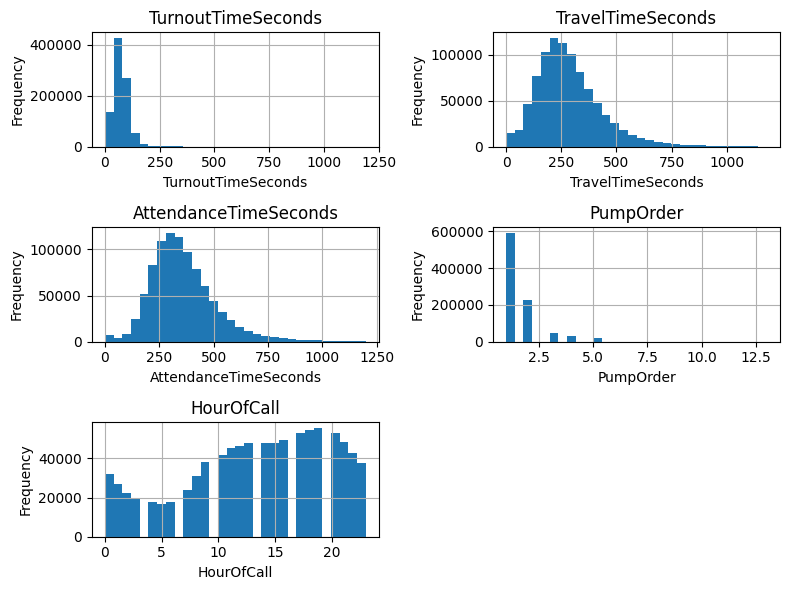

In [ ]:
# Histogram visualisation for key numerical variables for:

hist_columns = hist_columns = [
    "TurnoutTimeSeconds",
    "TravelTimeSeconds",
    "AttendanceTimeSeconds",
    "PumpOrder",
    "HourOfCall"
    ]

# Distribution of key numerical variables

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for i, column in enumerate(hist_columns, 1):
    plt.subplot(3, 2, i)
    mobilisation[column].dropna().hist(bins=30)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



##### Histogram Interpretation

**TurnoutTimeSeconds**  
Most turnout times are clustered at relatively low values, indicating that mobilisation typically occurs quickly after a call is received. The distribution is strongly right-skewed, with a small number of incidents showing substantially longer turnout times.

**TravelTimeSeconds**  
Travel times form a right-skewed distribution with a clear peak at moderate values. While most appliances arrive within a relatively consistent time window, a longer tail indicates occasional incidents with extended travel times, likely related to distance, traffic, or location-specific factors.

**AttendanceTimeSeconds**  
Attendance time shows a similar right-skewed pattern, combining the effects of turnout and travel. Most incidents fall within a moderate range, but a small proportion of incidents experience considerably longer attendance times, reflecting delayed or complex responses.

**PumpOrder**  
The majority of records correspond to low pump order values, particularly first and second attending pumps. Higher pump orders occur much less frequently, indicating that most incidents are handled with a small number of resources, while larger-scale responses are comparatively rare.

**HourOfCall**  
Calls are distributed across all hours of the day, with noticeable variation in frequency. Higher call volumes appear during daytime and early evening hours, while lower frequencies are observed during the early morning, suggesting a daily operational rhythm.

#### Variable Type Classification

In [ ]:
# Determining categories of each column of the mobilisation dataset
# Classification based on data type and number of unique values

categories = []

for column in mobilisation.columns:
  series = mobilisation[column].dropna()      # remove NaNs
  if series.dtype in ['int64','float64']:
    category = 'Quantitative'
  else:
    num_unique_values = series.nunique()

    if num_unique_values == 1:      # In this project, "Unique Value" refers to columns with one identical value across all records (not identifiers)
      category = 'Unique Value (constant)'
    elif num_unique_values == 2:
      category = 'Categorical - Binary'
    elif num_unique_values <=5:
      category = 'Categorical - 3 to 5 Categories'
    elif num_unique_values <=10:
      category = 'Categorical - 6 to 10 Categories'
    elif num_unique_values >10:
      category = 'Categorical - more than 10 Categories'

  categories.append(category)

column_categories = pd.DataFrame({'ColumnName':mobilisation.columns,
                                  'Category': categories})
display(column_categories)

,ColumnName,Category
0,IncidentNumber,Categorical - more than 10 Categories
1,CalYear,Quantitative
2,BoroughName,Categorical - more than 10 Categories
3,WardName,Categorical - more than 10 Categories
4,HourOfCall,Quantitative
5,ResourceMobilisationId,Quantitative
6,Resource_Code,Categorical - more than 10 Categories
7,PerformanceReporting,Categorical - 3 to 5 Categories
8,DateAndTimeMobilised,Categorical - more than 10 Categories
9,DateAndTimeMobile,Categorical - more than 10 Categories


#### Overview of Selected Categorical Variables (<10 Categories)

In [ ]:
# Understanding the categorical structure of selected variables
# Categories for columns with 10 or fewer categories

print(
    "Categories of 'PerformanceReporting':",
    sorted(mobilisation['PerformanceReporting'].dropna().unique())
     )

print(
    "Categories of 'DeployedFromLocation':",
    sorted(mobilisation['DeployedFromLocation'].dropna().unique())
     )

print(
    "Categories of 'PlusCode_Code':",
    sorted(mobilisation['PlusCode_Code'].dropna().unique())
     )

print(
    "Categories of 'PlusCode_Description':",
    sorted(mobilisation['PlusCode_Description'].dropna().unique())
     )

print(
    "Categories of 'DelayCode_Description':",
    sorted(mobilisation['DelayCode_Description'].dropna().unique())
     )

Categories of 'PerformanceReporting': ['1', '2', 'Not Used']
Categories of 'DeployedFromLocation': ['Home Station', 'Other Station']
Categories of 'PlusCode_Code': ['Initial']
Categories of 'PlusCode_Description': ['Initial Mobilisation']
Categories of 'DelayCode_Description': ['Address incomplete/wrong', 'Appliance/Equipment defect', 'Arrived but held up - Other reason', 'At drills when mobilised', 'Mob/Radio problems when mobilised', 'Not held up', 'On outside duty when mobilised', 'Traffic calming measures', 'Traffic, roadworks, etc', 'Weather conditions']


#### Mobilisation Dataset Metadata

In [ ]:
# Load metadata describing the mobilisation dataset columns
# The mobilisation dataset contains 24 columns, but only 22 of them are described in the metadata
# Missing metadata for "BoroughName" and "WardName"

Metadata_mob = pd.read_csv("Mobilisations_Metadata.csv")
display(Metadata_mob)

,Column,Sample record,Description
0,IncidentNumber,000008-01012018,LFB Incident Number
1,CalYear,2018,Year of 999 call
2,HourOfCall,3,Hour of 999 call
3,ResourceMobilisationId,5055153,LFB Resource Mobilisation ID
4,Resource_Code,A392,LFB Resource Code
5,PerformanceReporting,1,First Pump arrived at incident
6,DateAndTimeMobilised,01/01/2018 00:04:25,Date and time of mobilised (GMT)
7,DateAndTimeMobile,01/01/2018 00:05:38,Date and time of mobile (GMT)
8,DateAndTimeArrived,01/01/2018 00:10:13,Date and time arrived (GMT)
9,TurnoutTimeSeconds,73,Turnout time in seconds


### Incidents Data

---




#### Loading and Filtering the Incidents Dataset

In [ ]:
#The incidents datasets were first concatenated row-wise and subsequently filtered to obtain records from 2021 to 2025.

# Load incidents datasets (2018–onwards), then filter to 2021–2025
df_i_18_23 = pd.read_csv("LFB_Incident_2018_2023.csv")
df_i_24 = pd.read_csv("LFB_Incident_2024_onwards.csv")

# Concatenate incidents datasets row-wise
incidents = pd.concat(
    [df_i_18_23, df_i_24],
    ignore_index=True
    )

# Filter for incidents between 2021 and 2025
incidents = incidents.loc[
    (incidents["CalYear"] >= 2021) &
    (incidents["CalYear"] <= 2025)
    ]

# Reset index after filtering
incidents = incidents.reset_index(drop=True)

# check the shape of the combined incidents dataset
print("Incidents Shape:", incidents.shape)


Incidents Shape: (621495, 39)


#### Data Types of Incidents Dataset

In [ ]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621495 entries, 0 to 621494
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          621495 non-null  object 
 1   DateOfCall                              621495 non-null  object 
 2   CalYear                                 621495 non-null  int64  
 3   TimeOfCall                              621495 non-null  object 
 4   HourOfCall                              621495 non-null  int64  
 5   IncidentGroup                           621483 non-null  object 
 6   StopCodeDescription                     621495 non-null  object 
 7   SpecialServiceType                      239612 non-null  object 
 8   PropertyCategory                        621488 non-null  object 
 9   PropertyType                            621488 non-null  object 
 10  AddressQualifier                        6214

#### Missing Values Analysis

In [ ]:
# Determining percentage of missing values per column in the incidents dataset

missing_values_inc = incidents.isna().mean()*100
print(missing_values_inc)

IncidentNumber                             0.000000
DateOfCall                                 0.000000
CalYear                                    0.000000
TimeOfCall                                 0.000000
HourOfCall                                 0.000000
IncidentGroup                              0.001931
StopCodeDescription                        0.000000
SpecialServiceType                        61.445868
PropertyCategory                           0.001126
PropertyType                               0.001126
AddressQualifier                           0.000161
Postcode_full                             59.077064
Postcode_district                          0.000000
UPRN                                       0.000000
USRN                                       0.000000
IncGeo_BoroughCode                         0.000000
IncGeo_BoroughName                         0.000000
ProperCase                                 0.000000
IncGeo_WardCode                            0.119550
IncGeo_WardN

#### Numerical Variable Distributions

##### Summary Statistics and Skewness

In [ ]:
# Identify numerical columns
numerical_columns = incidents.select_dtypes(include=['int64','float64']).columns.tolist()

# Calculate skewness for each numerical column
skewness_values = []

for column in numerical_columns:
    skewness_values.append(incidents[column].skew())

# Create summary table
summary_table = pd.DataFrame({
    "ColumnName": numerical_columns,
    "Skewness": skewness_values
})

# Classify distribution shape based on skewness
distributions = []

for value in summary_table["Skewness"]:
    if pd.isna(value):
        distributions.append("All values missing")    #  Avoid incorrect skewness classification
    elif value >= -0.5 and value <= 0.5:
        distributions.append("Approximately Normal")
    elif value > 0.5:
        distributions.append("Right-skewed")
    elif value < -0.5:
        distributions.append("Left-skewed")


summary_table["Distribution"] = distributions

display(summary_table)

,ColumnName,Skewness,Distribution
0,CalYear,-0.061146,Approximately Normal
1,HourOfCall,-0.454877,Approximately Normal
2,UPRN,2.712239,Right-skewed
3,USRN,4.592886,Right-skewed
4,Easting_m,-0.130864,Approximately Normal
5,Northing_m,-0.251339,Approximately Normal
6,Easting_rounded,-0.109113,Approximately Normal
7,Northing_rounded,-0.251448,Approximately Normal
8,Latitude,-15.646894,Left-skewed
9,Longitude,-0.129799,Approximately Normal


##### Distribution of Key Numerical Variables (Histograms)


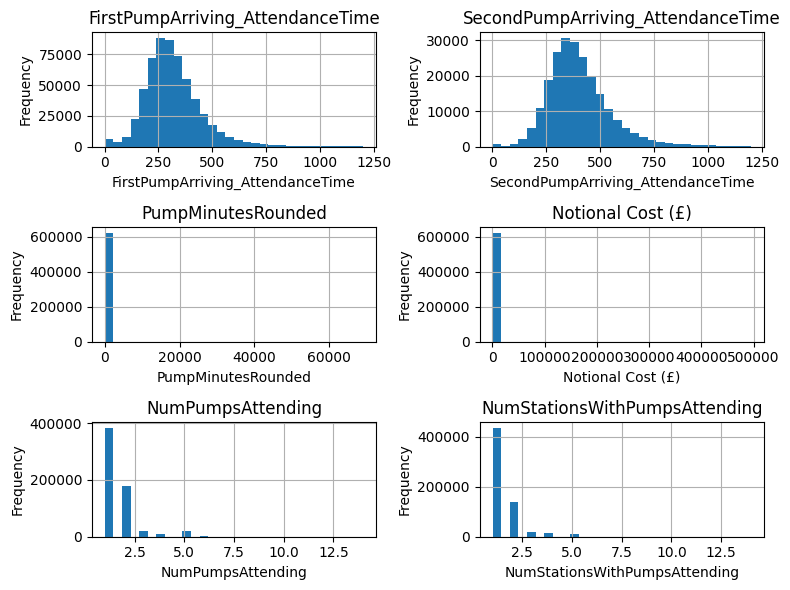

In [ ]:
# Histogram visualisation for key numerical variables for:

hist_columns = [
    "FirstPumpArriving_AttendanceTime",
    "SecondPumpArriving_AttendanceTime",
    "PumpMinutesRounded",
    "Notional Cost (£)",
    "NumPumpsAttending",
    "NumStationsWithPumpsAttending"
    ]

# Distribution of key numerical variables

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for i, column in enumerate(hist_columns, 1):
    plt.subplot(3, 2, i)
    incidents[column].dropna().hist(bins=30)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

##### Histogram Interpretation


**FirstPumpArriving_AttendanceTime**  
Most incidents cluster around relatively short first pump arrival times. The distribution is right-skewed, meaning that while the majority of responses are quick, a smaller number of incidents show notably longer arrival times.

**SecondPumpArriving_AttendanceTime**  
A similar pattern appears for the second pump. Most second pump arrivals happen within a moderate time range, but there is a clear right tail, suggesting that additional resources are sometimes dispatched much later depending on the nature of the incident.

**PumpMinutesRounded**  
Pump minutes are strongly right-skewed. Most incidents require only a limited amount of pump time, whereas a small number of incidents generate very large values. This indicates the presence of extreme outliers and supports using the median rather than the mean.

**Notional Cost (£)**  
The cost distribution closely follows the pattern of pump minutes. Most incidents are associated with relatively low costs, while a small subset of incidents drives very high costs, reflecting long or resource-intensive operations.

**NumPumpsAttending**  
Most incidents involve one or two pumps. As the number of pumps increases, the frequency drops quickly, showing that large multi-pump deployments are comparatively rare.

**NumStationsWithPumpsAttending**  
The majority of incidents involve a single station. Incidents requiring pumps from multiple stations occur less frequently and typically correspond to more complex situations.

#### Variable Type Classification

In [ ]:
# Determining categories of each column of the incidents dataset
# Classification based on data type and number of unique values

categories = []

for column in incidents.columns:
  series = incidents[column].dropna()      # remove NaNs
  if series.dtype in ['int64','float64']:
    category = 'Quantitative'
  else:
    num_unique_values = series.nunique()

    if num_unique_values == 1:      # In this project, "Unique Value" refers to columns with one identical value across all records (not identifiers)
      category = 'Unique Value (constant)'
    elif num_unique_values == 2:
      category = 'Categorical - Binary'
    elif num_unique_values <=5:
      category = 'Categorical - 3 to 5 Categories'
    elif num_unique_values <=10:
      category = 'Categorical - 6 to 10 Categories'
    elif num_unique_values >10:
      category = 'Categorical - more than 10 Categories'

  categories.append(category)

column_categories_inc = pd.DataFrame({'ColumnName':incidents.columns,
                                  'Category': categories})
display(column_categories_inc)

,ColumnName,Category
0,IncidentNumber,Categorical - more than 10 Categories
1,DateOfCall,Categorical - more than 10 Categories
2,CalYear,Quantitative
3,TimeOfCall,Categorical - more than 10 Categories
4,HourOfCall,Quantitative
5,IncidentGroup,Categorical - 3 to 5 Categories
6,StopCodeDescription,Categorical - more than 10 Categories
7,SpecialServiceType,Categorical - more than 10 Categories
8,PropertyCategory,Categorical - 6 to 10 Categories
9,PropertyType,Categorical - more than 10 Categories


#### Overview of Selected Categorical Variables (<10 Categories)

In [ ]:
# Understanding the categorical structure of selected variables
# Categories for columns with fewer than 10 categories

print(
    "Categories of 'PropertyCategory':",
    sorted(incidents['PropertyCategory'].dropna().unique())
     )

print(
    "Categories of 'IncidentGroup':",
    sorted(incidents['IncidentGroup'].dropna().unique())
     )

print(
    "Categories of 'FRS':",
    sorted(incidents['FRS'].dropna().unique())
     )

Categories of 'PropertyCategory': ['Aircraft', 'Boat', 'Dwelling', 'Non Residential', 'Other Residential', 'Outdoor', 'Outdoor Structure', 'Rail Vehicle', 'Road Vehicle']
Categories of 'IncidentGroup': ['False Alarm', 'Fire', 'Special Service']
Categories of 'FRS': ['London']


#### Incidents Dataset Metadata

In [ ]:
# Load metadata describing the incidents dataset columns

Metadata_inc = pd.read_csv("Incident_Metadata.csv")
display(Metadata_inc)

,Column,Sample record,Description,Extra Notes
0,IncidentNumber,000008-01012018,LFB Incident Number,NaN
1,DateOfCall,2018-01-01 00:00:00,Date of 999 call,NaN
2,CalYear,2018,Year of 999 call,NaN
3,TimeOfCall,00:04:25,Time of 999 call,NaN
4,HourOfCall,0,Hour of 999 call,NaN
5,IncidentGroup,False Alarm,High level incident category,NaN
6,StopCodeDescription,AFA,Detailed incident category,NaN
7,SpecialServiceType,NaN,Further detail for special services incident c...,NaN
8,PropertyCategory,Non Residential,High level property descriptor,NaN
9,PropertyType,Mosque,Detailed property descriptor,NaN


## **Step 2: Data Cleaning & Preprocessing**


### Load Only Required Datasets For Further Analysis



This step reloads only the datasets needed for the subsequent analysis, allowing Step 2 to be executed independently from Step 1.

In [ ]:
# Install and import gdown for downloading files from Google Drive

!pip install -U gdown
import gdown

# Download only required datasets from Google Drive
# XLSX files were pre-converted to CSV for much faster processing in Google Colab.
# Each tuple contains: ("local_filename", "google_drive_file_id")

files = [
    # ("local_filename",                            "google_drive_file_id")

    # Mobilisations
    ("LFB_Mobilisation_2021_2024.csv",              "13qy_sUe4oIhGTTWXoBNFMucxR5_aSH_g"),
    ("LFB_Mobilisation_2025.csv",                   "1MZT1Q0CYy4BQ_SVCkVCz9b4bVJRwjyBu"),

    # Incidents
    ("LFB_Incident_2018_2023.csv",                 "1i_ae9H5qiChlfbbWQKR7NzHjCBgMEAjB"),
    ("LFB_Incident_2024_onwards.csv",              "1pxuplo06Mo8mi0SzHQDPq8ifqV3dT8aL"),
    ]

for filename, file_id in files:
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, filename, quiet=False)

import pandas as pd


print("\nDownloaded files:")
for filename, _ in files:
    print("-", filename)
    _ = pd.read_csv(filename)

#-------------------------------------------------------------------------------

# The mobilisation datasets for 2021–2024 and 2025 were concatenated row-wise to create a single dataset covering the period from 2021 to 2025.

# Load mobilisation datasets for the period 2021–2025
df_m_21_24 = pd.read_csv("LFB_Mobilisation_2021_2024.csv")
df_m_25 = pd.read_csv("LFB_Mobilisation_2025.csv")

# Concatenate mobilisation datasets row-wise
mobilisation = pd.concat(
    [df_m_21_24, df_m_25],
    ignore_index=True
    )

# check the shape of the combined mobilisation dataset
print("Mobilisation Shape:", mobilisation.shape)

#-------------------------------------------------------------------------------

#The incidents datasets were first concatenated row-wise and subsequently filtered to obtain records from 2021 to 2025.

# # Load incidents datasets (2018–onwards), then filter to 2021–2025
df_i_18_23 = pd.read_csv("LFB_Incident_2018_2023.csv")
df_i_24 = pd.read_csv("LFB_Incident_2024_onwards.csv")

# Concatenate incidents datasets row-wise
incidents = pd.concat(
    [df_i_18_23, df_i_24],
    ignore_index=True
    )

# Filter for incidents between 2021 and 2025
incidents = incidents.loc[
    (incidents["CalYear"] >= 2021) &
    (incidents["CalYear"] <= 2025)
    ]

# Reset index after filtering
incidents = incidents.reset_index(drop=True)

# check the shape of the combined incidents dataset
print("Incidents Shape:", incidents.shape)


Downloading...
From (original): https://drive.google.com/uc?id=13qy_sUe4oIhGTTWXoBNFMucxR5_aSH_g
From (redirected): https://drive.google.com/uc?id=13qy_sUe4oIhGTTWXoBNFMucxR5_aSH_g&confirm=t&uuid=422a7b06-0445-40d0-9746-005cabc58740
To: /content/LFB_Mobilisation_2021_2024.csv
100%|██████████| 159M/159M [00:02<00:00, 68.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MZT1Q0CYy4BQ_SVCkVCz9b4bVJRwjyBu
To: /content/LFB_Mobilisation_2025.csv
100%|██████████| 41.6M/41.6M [00:00<00:00, 76.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1i_ae9H5qiChlfbbWQKR7NzHjCBgMEAjB
From (redirected): https://drive.google.com/uc?id=1i_ae9H5qiChlfbbWQKR7NzHjCBgMEAjB&confirm=t&uuid=c3960003-d098-4c8b-949f-9ba3e13dfc8c
To: /content/LFB_Incident_2018_2023.csv
100%|██████████| 224M/224M [00:03<00:00, 66.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pxuplo06Mo8mi0SzHQDPq8ifqV3dT8aL
To: /content/LFB_Incident_2024_onwards.csv
100%|██████████| 86.8M/86.8M [00:00<00:00


Downloaded files:
- LFB_Mobilisation_2021_2024.csv
- LFB_Mobilisation_2025.csv
- LFB_Incident_2018_2023.csv
- LFB_Incident_2024_onwards.csv
Mobilisation Shape: (917656, 24)
Incidents Shape: (621495, 39)


### Mobilisation Data

---





#### Cleaning & Preprocessing


##### Data Type Conversion


In [ ]:
# Convert columns related to datetime from object to datetime dtype
# to facilitate analysis based on datetime and use of date/time features.

mobilisation_datetime_columns = [
                   "DateAndTimeMobilised",
                   "DateAndTimeMobile",
                   "DateAndTimeArrived",
                   "DateAndTimeLeft"
                    ]

for column in mobilisation_datetime_columns:
    mobilisation[column] = pd.to_datetime(
                                       mobilisation[column],
                                       format="%d/%m/%Y %H:%M",   # Convert datetime columns using known format (DD/MM/YYYY HH:MM)
                                       errors="coerce"            # # Explicit format ensures correct datetime conversion and prevents unintended NaT values.
                                       )

# Convert dtypes of 'CalYear' and 'HourOfCall', since they represent discrete Years or Hours,
# respectively, and will be used for grouping and filtering, rather than for numerical analysis.

mobilisation["CalYear"] = mobilisation["CalYear"].astype("category")
mobilisation["HourOfCall"] = mobilisation["HourOfCall"].astype("category")

# Convert dtypes of 'ResourceMobilisationId', since it represents an Identifier
# used for record identification, not for numerical analysis.

mobilisation["ResourceMobilisationId"] = mobilisation["ResourceMobilisationId"].astype("category")

# Convert object columns representing identifiers, codes and labels to categorical dtype.
# These columns will be used for grouping and filtering.

mobilisation_categorical_columns = [
                      "IncidentNumber",             # unique incident identifier category, used for linking records
                      "BoroughName",                # geographic category
                      "WardName",                   # geographic category
                      "Resource_Code",              # fire engine identifier category
                      "PerformanceReporting",       # performance reporting category
                      "DeployedFromStation_Code",   # station identifier category
                      "DeployedFromStation_Name",   # station name category
                      "DeployedFromLocation",       # deployment type category (e.g. Home Station, Other Station)
                      "PumpOrder",                  # sequence in which pumps were mobilised (ordinal category)
                      "DelayCode_Description"       # delay reason category
                       ]

for column in mobilisation_categorical_columns:
    mobilisation[column] = mobilisation[column].astype("category")

# Keep time-in-seconds columns as numerical since they represent measured values and will be used in numerical analysis.
# Keep the following columns as numerical:
# TurnoutTimeSeconds: measured time in seconds
# TravelTimeSeconds: measured time in seconds
# AttendanceTimeSeconds: measured time in seconds


##### Datetime Feature Engineering: Deriving Date, Time, and Calendar Features

Datetime columns are split into separate date and time components to enable analysis by hour of day, grouping based on date, and a wider range of visualisation.


In [ ]:
# Create separate date and time columns
# Original datetime columns are kept unchanged for flexibility

mobilisation["Mobilised_Date"] = mobilisation["DateAndTimeMobilised"].dt.normalize()  #dt.normalize() keeps CallDate as datetime64
mobilisation["Mobilised_Time"] = mobilisation["DateAndTimeMobilised"].dt.time

mobilisation["Mobile_Date"] = mobilisation["DateAndTimeMobile"].dt.normalize()
mobilisation["Mobile_Time"] = mobilisation["DateAndTimeMobile"].dt.time

mobilisation["Arrived_Date"] = mobilisation["DateAndTimeArrived"].dt.normalize()
mobilisation["Arrived_Time"] = mobilisation["DateAndTimeArrived"].dt.time

mobilisation["Left_Date"] = mobilisation["DateAndTimeLeft"].dt.normalize()
mobilisation["Left_Time"] = mobilisation["DateAndTimeLeft"].dt.time

display(mobilisation.dtypes)

,0
IncidentNumber,category
CalYear,category
BoroughName,category
WardName,category
HourOfCall,category
ResourceMobilisationId,category
Resource_Code,category
PerformanceReporting,category
DateAndTimeMobilised,datetime64[ns]
DateAndTimeMobile,datetime64[ns]


#####  Missing Value Handling

Missing values in the mobilisation dataset are handled based on proportion and variable type: very low proportions are removed, skewed numerical variables are filled using the median, and structural missing values are replaced with appropriate labels.


###### Table of Missing Values

In [ ]:
# Check remaining missing values
print("Missing values (mobilisation):\n", mobilisation.isna().mean()*100)


Missing values (mobilisation):
 IncidentNumber                0.000000
CalYear                       0.000000
BoroughName                   0.377375
WardName                      0.488309
HourOfCall                    0.000000
ResourceMobilisationId        0.000000
Resource_Code                 0.000000
PerformanceReporting          0.000000
DateAndTimeMobilised          0.000000
DateAndTimeMobile             0.444938
DateAndTimeArrived            0.000000
TurnoutTimeSeconds            0.447117
TravelTimeSeconds             0.448316
AttendanceTimeSeconds         0.000000
DateAndTimeLeft               0.041083
DateAndTimeReturned         100.000000
DeployedFromStation_Code      0.000436
DeployedFromStation_Name      0.000436
DeployedFromLocation          0.104832
PumpOrder                     0.000000
PlusCode_Code                 0.000000
PlusCode_Description          0.000000
DelayCodeId                  74.279795
DelayCode_Description        74.279795
Mobilised_Date                0.

###### Apply Missing Value Handling Strategy

In [ ]:
# Remove rows with missing values from columns with very low proportions of missing values (< 0.5%)

mobilisation_low_missing_value_columns = [
                              "BoroughName",
                              "WardName",
                              "DateAndTimeMobile",
                              "DateAndTimeLeft",
                              "DeployedFromStation_Code",
                              "DeployedFromStation_Name",
                              "DeployedFromLocation"
                              ]

mobilisation = mobilisation.dropna(subset=mobilisation_low_missing_value_columns)
mobilisation = mobilisation.copy()


# Numerical columns with skewed distribution and low proportions of missing values (< 0.5%).
# Missing values are replaced using the median.

mobilisation_skewed_numerical_columns = [
                            "TurnoutTimeSeconds",
                            "TravelTimeSeconds"
                            ]

for column in mobilisation_skewed_numerical_columns :
  median = mobilisation[column].median()
  mobilisation[column] = mobilisation[column].fillna(median)

# ~75% of DelayCode_Description values are missing, indicating that no delay occurred in most cases.
# Replace missing values with 'No delay' (added as a valid category first to avoid errors).

if "No delay" not in mobilisation["DelayCode_Description"].cat.categories:
  mobilisation["DelayCode_Description"] = mobilisation["DelayCode_Description"].cat.add_categories(["No delay"])

mobilisation["DelayCode_Description"] = mobilisation["DelayCode_Description"].fillna("No delay")

##### Column Reduction

In [ ]:
# Remove non-essential columns to ensure a streamlined dataset

mobilisation_columns_to_remove = [
                    "DateAndTimeReturned",      # contains 100% missing values and is therefore removed.
                    "PlusCode_Code",            # contains constant value ('Initial'), nothing to analyse
                    "PlusCode_Description",     # contains constant value ('Initial Mobilisation'), nothing to analyse
                    "DelayCodeId"               # high proportion of missing values and not needed since DelayCode_Description will be used for analysis
                    ]

mobilisation = mobilisation.drop(columns=mobilisation_columns_to_remove)

##### Post-cleaning validation


In [ ]:
# Check remaining missing values
print("Missing values (mobilisation):\n", mobilisation.isna().mean()*100)
print("\n")
# Check dtypes after conversion
print("Mobilisation dtypes:\n", mobilisation.dtypes)
print("\n")
# Check final shape
print("Mobilisation shape:", mobilisation.shape)

Missing values (mobilisation):
 IncidentNumber              0.0
CalYear                     0.0
BoroughName                 0.0
WardName                    0.0
HourOfCall                  0.0
ResourceMobilisationId      0.0
Resource_Code               0.0
PerformanceReporting        0.0
DateAndTimeMobilised        0.0
DateAndTimeMobile           0.0
DateAndTimeArrived          0.0
TurnoutTimeSeconds          0.0
TravelTimeSeconds           0.0
AttendanceTimeSeconds       0.0
DateAndTimeLeft             0.0
DeployedFromStation_Code    0.0
DeployedFromStation_Name    0.0
DeployedFromLocation        0.0
PumpOrder                   0.0
DelayCode_Description       0.0
Mobilised_Date              0.0
Mobilised_Time              0.0
Mobile_Date                 0.0
Mobile_Time                 0.0
Arrived_Date                0.0
Arrived_Time                0.0
Left_Date                   0.0
Left_Time                   0.0
dtype: float64


Mobilisation dtypes:
 IncidentNumber                   

Post-cleaning validation of the mobilisation dataset confirms that missing values are handled as intended, variables have appropriate data types, and the dataset is ready for exploratory analysis and visualisation.


### Incidents Data

---


#### Cleaning & Preprocessing

##### Data Type Conversion

In [ ]:
# Convert DateOfCall and TimeOfCall to datetime using known formats

incidents["DateOfCall"] = pd.to_datetime(incidents["DateOfCall"], format="%Y-%m-%d", errors="coerce")
incidents["TimeOfCall"] = pd.to_datetime(incidents["TimeOfCall"], format="%H:%M:%S", errors="coerce")

# Convert CalYear and HourOfCall to categorical
# Used for grouping and filtering, not numerical analysis

incidents["CalYear"] = incidents["CalYear"].astype("category")
incidents["HourOfCall"] = incidents["HourOfCall"].astype("category")

# Convert identifier columns to categorical dtype
# Identifiers are not used for numerical analysis

incidents["IncidentNumber"] = incidents["IncidentNumber"].astype("category")
incidents["UPRN"] = incidents["UPRN"].astype("category")
incidents["USRN"] = incidents["USRN"].astype("category")

# Convert descriptive and geographic label columns to categorical dtype
# These columns represent categories used for grouping and filtering.

incidents_categorical_columns = [
                  "IncidentGroup",            # high-level incident category
                  "StopCodeDescription",      # detailed incident category
                  "SpecialServiceType",       # special service sub-category
                  "PropertyCategory",         # high-level property type category
                  "PropertyType",             # detailed property type category
                  "AddressQualifier",         # address qualifier category
                  "Postcode_district",        # postcode district category
                  "IncGeo_BoroughCode",       # borough code category
                  "IncGeo_BoroughName",       # borough name category
                  "ProperCase",               # borough name (formatted) category
                  "IncGeo_WardCode",          # ward code category
                  "IncGeo_WardName",          # ward name category
                  "IncGeo_WardNameNew",       # updated ward name category
                  "IncidentStationGround",     # station ground category
                  "FirstPumpArriving_DeployedFromStation",   # first pump deployment station
                  "SecondPumpArriving_DeployedFromStation"  # second pump deployment category
                    ]

for column in incidents_categorical_columns:
    incidents[column] = incidents[column].astype("category")

# Keep time and count variables as numerical since they represent measured or counted values
# and will be used in numerical analysis and visualisations.

# FirstPumpArriving_AttendanceTime: response time in seconds (continuous measured duration)
# SecondPumpArriving_AttendanceTime: response time in seconds for second pump (continuous measured duration)
# NumStationsWithPumpsAttending: count of stations attending an incident
# NumPumpsAttending: count of pumps attending an incident
# PumpCount: total number of pumps mobilised to an incident
# PumpMinutesRounded: total pump time spent at incident (minutes, rounded up to 60 if less than an hour)
# Notional Cost (£): calculated cost based on pump time (monetary continuous value)
# NumCalls: number of emergency calls received about the incident


##### Datetime Feature Engineering: Deriving Date, Time, and Calendar Features


Datetime columns are split into separate date and time components to enable analysis by year, month, weekday, hour of day and grouping based on date.

In [ ]:
# Create separate date and time columns from the original datetime columns.
# The original datetime columns are kept unchanged for flexibility in later analys

# Extract the calendar date of the incident
incidents["CallDate"] = incidents["DateOfCall"].dt.normalize() # dt.normalize() keeps CallDate as datetime64

# Extract  the month of incident CallDate
incidents["CallMonth"] = incidents["CallDate"].dt.month

# Extract  weekday name
incidents["CallWeekday"] = incidents["DateOfCall"].dt.day_name()

# Extract the time of day of the incident call
incidents["CallTime"] = incidents["TimeOfCall"].dt.time

#####  Missing Value Handling

Missing values in the incidents dataset are handled based on proportion and variable type.
Very low proportions of missing categorical values are removed.
Structural missing values (e.g. SpecialServiceType) are replaced with appropriate labels.
For first pump response variables, rows with missing FirstPumpArriving_DeployedFromStation are removed and remaining missing values in FirstPumpArriving_AttendanceTime are filled using the median.
Columns with a very high proportion of missing values and limited analytical value are removed.

###### Table of Missing Values

In [ ]:
# Check remaining missing values
print("Missing values (incidents):\n", incidents.isna().mean()*100)

Missing values (incidents):
 IncidentNumber                             0.000000
DateOfCall                                 0.000000
CalYear                                    0.000000
TimeOfCall                                 0.000000
HourOfCall                                 0.000000
IncidentGroup                              0.001931
StopCodeDescription                        0.000000
SpecialServiceType                        61.445868
PropertyCategory                           0.001126
PropertyType                               0.001126
AddressQualifier                           0.000161
Postcode_full                             59.077064
Postcode_district                          0.000000
UPRN                                       0.000000
USRN                                       0.000000
IncGeo_BoroughCode                         0.000000
IncGeo_BoroughName                         0.000000
ProperCase                                 0.000000
IncGeo_WardCode                    

###### Apply Missing Value Handling Strategy

In [ ]:
# Remove rows with missing values from columns with very low proportions of missing values (< 1%)

incidents_low_missing_value_columns = [
                            "IncidentGroup",
                            "PropertyType",
                            "AddressQualifier",
                            "IncGeo_WardCode",
                            "IncGeo_WardName",
                            "IncGeo_WardNameNew",
                            "IncidentStationGround",
                            "NumCalls"
                            ]

incidents = incidents.dropna(subset=incidents_low_missing_value_columns).copy()

# Missing SpecialServiceType indicates that no special service was required
# Ensure category exists before filling (prevents errors when column is categorical)

if "No special service required" not in incidents["SpecialServiceType"].cat.categories:
    incidents["SpecialServiceType"] = (incidents["SpecialServiceType"]
                                      .cat.add_categories(["No special service required"])
                                       )

incidents["SpecialServiceType"] = (incidents["SpecialServiceType"]
                                  .fillna("No special service required")
                                   )

# Missing value indicates that no second pump was deployed
# Ensure category exists before filling (prevents errors when column is categorical)

if "Only one pump deployed" not in incidents["SecondPumpArriving_DeployedFromStation"].cat.categories:
    incidents["SecondPumpArriving_DeployedFromStation"] = (incidents["SecondPumpArriving_DeployedFromStation"]
                                                          .cat.add_categories(["Only one pump deployed"])
                                                           )

incidents["SecondPumpArriving_DeployedFromStation"] = (incidents["SecondPumpArriving_DeployedFromStation"]
                                                      .fillna("Only one pump deployed")
                                                       )

# SecondPumpArriving_AttendanceTime has a high proportion of missing values.
# Values remain as NaN; analyses using this variable will be restricted
# to incidents where a second pump was deployed.

# Remove rows where no first pump deployment information is available

incidents = incidents.dropna(subset=["FirstPumpArriving_DeployedFromStation"]).copy()

# First pump attendance time is right-skewed with a small proportion of missing values
# Replace remaining missing values with the median
median_first_pump = incidents["FirstPumpArriving_AttendanceTime"].median()
incidents["FirstPumpArriving_AttendanceTime"] = (incidents["FirstPumpArriving_AttendanceTime"]
                                                   .fillna(median_first_pump))

###### Replace Missing Values in Skewed Numerical Count Variables (Median)

incidents["NumStationsWithPumpsAttending"] = (incidents["NumStationsWithPumpsAttending"]
                                             .fillna(incidents["NumStationsWithPumpsAttending"].median())
                                              )

incidents["NumPumpsAttending"] = (incidents["NumPumpsAttending"]
                                 .fillna(incidents["NumPumpsAttending"].median())
                                 )

##### Column Reduction

In [ ]:
# Drop columns with very high proportions of missing values and limited analytical value

incidents_columns_to_remove = [
                              "Postcode_full",   # High proportion of missing values; district-level postcode is sufficient
                              "Easting_m",       # High proportion of missing values; use Easting_rounded instead
                              "Northing_m",      # High proportion of missing values; use Northing_rounded instead
                              "Latitude",        # High proportion of missing values; spatial analysis based on rounded coordinates
                              "Longitude",       # High proportion of missing values; spatial analysis based on rounded coordinates
                              "FRS"              # Constant value ("London") for all records; no analytical value
                                ]

incidents = incidents.drop(columns=incidents_columns_to_remove)

##### Post-cleaning validation

In [ ]:
# Check remaining missing values
print("Missing values (incidents):\n", incidents.isna().mean()*100)
print("\n")
# Check dtypes after conversion
print("Incidents dtypes:\n", incidents.dtypes)
print("\n")
# Check finalshape
print("\nIncidents shape:", incidents.shape)

Missing values (incidents):
 IncidentNumber                             0.000000
DateOfCall                                 0.000000
CalYear                                    0.000000
TimeOfCall                                 0.000000
HourOfCall                                 0.000000
IncidentGroup                              0.000000
StopCodeDescription                        0.000000
SpecialServiceType                         0.000000
PropertyCategory                           0.000000
PropertyType                               0.000000
AddressQualifier                           0.000000
Postcode_district                          0.000000
UPRN                                       0.000000
USRN                                       0.000000
IncGeo_BoroughCode                         0.000000
IncGeo_BoroughName                         0.000000
ProperCase                                 0.000000
IncGeo_WardCode                            0.000000
IncGeo_WardName                    

Post-cleaning validation of the incidents dataset confirms that missing values are handled as intended, variables have appropriate data types, and the dataset is ready for exploratory analysis and visualisation.

### Merge Datasets

---

The cleaned incidents and mobilisation datasets are merged on IncidentNumber to combine each incident with its corresponding response (mobilisation) information. A left join is used to keep all incident records while appending mobilisation data.

In [ ]:
# Create a backup copy of the mobilisation dataset.
# The original dataset will drop duplicate temporal (to avoid duplicate columns),
# while this copy is preserved for EDA and statistical analyses to retain HourOfCall and CalYear
mobilisation_eda = mobilisation.copy()

# Drop duplicate temporal columns to avoid _x/_y suffixes after merge
mobilisation = mobilisation.drop(columns=["HourOfCall", "CalYear"])

# Merge mobilisation data into incidents data on IncidentNumber
# Left join keeps all incidents and attaches mobilisation records.
# Because mobilisation can contain multiple rows per incident,
# the resulting dataset becomes mobilisation-level
# (i.e., one row per incident per responding pump).

incidents_mobilisation = incidents.merge(mobilisation, on="IncidentNumber", how="left")

print("Mobilisation shape:", mobilisation.shape)
print("Incidents shape:", incidents.shape)
print("Merged dataset shape:", incidents_mobilisation.shape)
incidents_mobilisation.info()
print("\n")
incidents_mobilisation['CallDate'].isna().sum()

Mobilisation shape: (907889, 26)
Incidents shape: (586183, 37)
Merged dataset shape: (911303, 62)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911303 entries, 0 to 911302
Data columns (total 62 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          911303 non-null  object        
 1   DateOfCall                              911303 non-null  datetime64[ns]
 2   CalYear                                 911303 non-null  category      
 3   TimeOfCall                              911303 non-null  datetime64[ns]
 4   HourOfCall                              911303 non-null  category      
 5   IncidentGroup                           911303 non-null  category      
 6   StopCodeDescription                     911303 non-null  category      
 7   SpecialServiceType                      911303 non-null  category      
 8   PropertyCategory

np.int64(0)

## **Step 3: Exploratory Data Analysis**





#### Import necessary libraries



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

#### 1. Number of Monthly Incident Trends by Incident Type

In [ ]:
# Monthly unique incident counts by incident type
monthly_incidents_by_type = (
                            incidents
                            .groupby(["CallMonth", "IncidentGroup"])["IncidentNumber"]
                            .nunique()
                            .reset_index(name="IncidentCount")
                             )

# Monthly unique incident counts across all incident types
monthly_incidents_total = (
                          incidents
                          .groupby("CallMonth")["IncidentNumber"]
                          .nunique()
                          .reset_index(name="IncidentCount")
                           )

# Label totals so they can be plotted together with incident types
monthly_incidents_total["IncidentGroup"] = "All Incidents"


# Combine monthly incident counts by type with overall totals into one long format table
monthly_incident_counts_long = pd.concat(
                                        [monthly_incidents_by_type, monthly_incidents_total],
                                        ignore_index=True
                                         )

/tmp/ipython-input-3812519674.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["CallMonth", "IncidentGroup"])["IncidentNumber"]


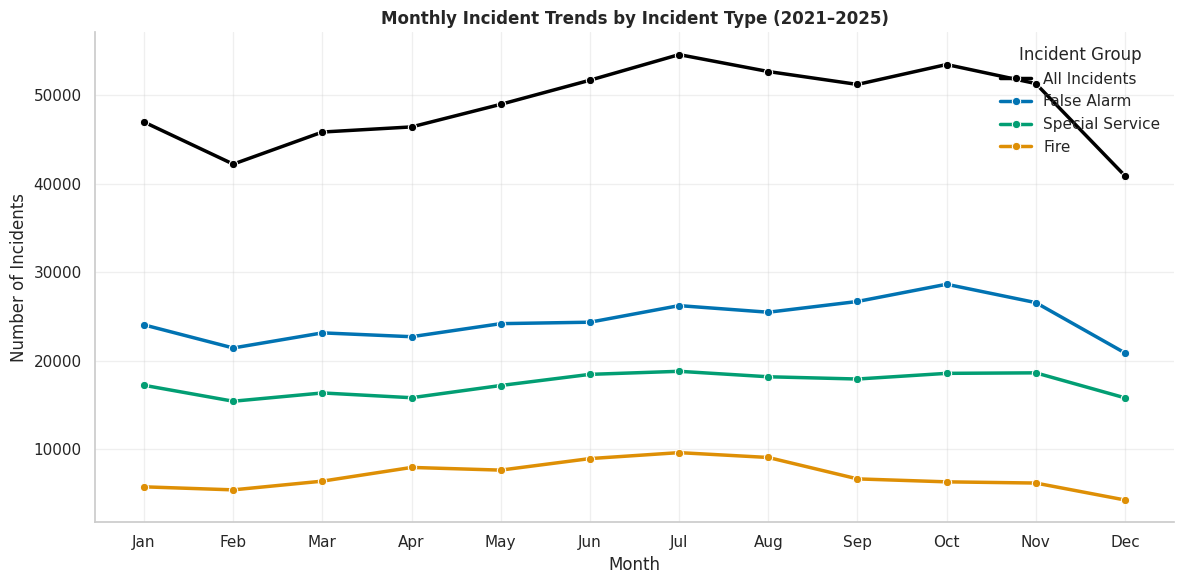

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a colorblind-friendly palette
# All Incidents is shown in black to clearly better distinguish totals from individual incident types
palette = {
          "All Incidents": "black",
          "False Alarm": sns.color_palette("colorblind")[0],
          "Fire": sns.color_palette("colorblind")[1],
          "Special Service": sns.color_palette("colorblind")[2],
           }

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

hue_order = [
            "All Incidents",
            "False Alarm",
            "Special Service",
            "Fire"
             ]

sns.lineplot(
            data=monthly_incident_counts_long,
            x="CallMonth",
            y="IncidentCount",
            hue="IncidentGroup",
            hue_order=hue_order,      # controls legend AND line order
            palette=palette,
            linewidth=2.5,
            marker="o"
             )

plt.title(
         "Monthly Incident Trends by Incident Type (2021–2025)",
         weight="bold"
          )

plt.xlabel("Month")
plt.ylabel("Number of Incidents")

plt.xticks(
          range(1, 13),
          ['Jan','Feb','Mar','Apr','May','Jun',
          'Jul','Aug','Sep','Oct','Nov','Dec']
           )

plt.grid(axis="y", alpha=0.3)
plt.grid(axis="x", alpha=0.3)

plt.legend(title="Incident Group", frameon=False)
sns.despine()
plt.tight_layout()
plt.show()


The Monthly Incident Trends by Incident Type Plot shows a seasonal pattern across fire, special service and false alarm is
The total number of incidents is lowest in December, with another drop in February, then increases steadily through spring and peaks in July before declining towards the end of the year
Fire incidents show the strongest seasonal effect with a  peak in July, which makes sense since the risk is higher during warmer months
Special service incidents follow a similar pattern but less pronounced. False alarms behave a bit differently,
they stay elevated even after summer and reach their highest peak in October.

#### 2. Daily and Hourly Incident Distribution (Pivot Table and Heatmap)

##### Pivot Table: Incident Counts by Weekday and Hour

In [ ]:
# Pivot table: weekday × hour
daily_hourly_incidents = incidents.pivot_table(
                                              index="HourOfCall",
                                              columns="CallWeekday",
                                              values="IncidentNumber",
                                              aggfunc="nunique"
                                               )

# Order by Weekday
weekday_order = [ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

daily_hourly_incidents = (
                         daily_hourly_incidents
                         .reindex(index=range(24))          # hours 0–23
                         .reindex(columns=weekday_order)    # Monday → Sunday
                          )

daily_hourly_incidents

/tmp/ipython-input-331180252.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  daily_hourly_incidents = incidents.pivot_table(


CallWeekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HourOfCall,,,,,,,
0,2778,2681,2622,2743,2814,3165,3280
1,2345,2268,2256,2249,2319,2755,2737
2,1889,1835,1829,1840,1965,2231,2375
3,1692,1744,1614,1632,1750,2069,2101
4,1537,1545,1462,1500,1566,1898,1983
5,1453,1374,1314,1389,1493,1664,1682
6,1657,1666,1610,1680,1631,1529,1578
7,2309,2310,2246,2330,2391,1965,1952
8,3034,3025,3114,2997,3042,2648,2360


##### Heatmap: Number of Incidents by Weekday and Hour

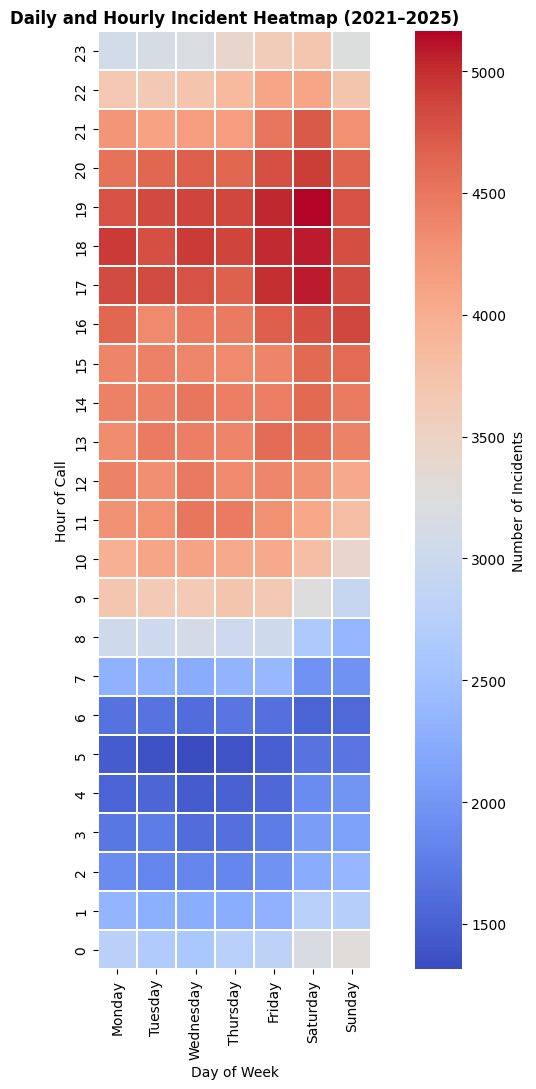

In [ ]:
figure, ax = plt.subplots(figsize=(9, 11))

sns.heatmap(
    daily_hourly_incidents,
    cmap="coolwarm",
    square=True,
    linewidths=0.3,
    linecolor="white",
    cbar_kws={"label": "Number of Incidents"},
    ax=ax
)

ax.invert_yaxis()  # 0 at bottom, 23 at top

ax.set_title("Daily and Hourly Incident Heatmap (2021–2025)", weight="bold")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Hour of Call")

plt.tight_layout()
plt.show()

The heatmap shows a daily rhythm of incident numbers. Incidents are lowest during the early morning hours and increase steadily throughout the day, reaching a peak between 17:00 and 19:00. This peak is visible on all weekdays and is strongest on Fridays and Saturdays. This reflects increased activity of people in the afternoon/evening (e.g. commuting, more traffic, and social activites), while at night there is reduced activity and therefore fewer reported incidents.

##### One-Way ANOVA (Attendance ~ HourOfCall) + Effect Size (Eta²)

In [ ]:
# Although attendance time exhibits positive skewness,
# the large sample size ensures that ANOVA remains robust to moderate deviations from normality.

# Work with mobilisation_eda dataset
df = mobilisation_eda.copy()

# Use only First Pump responses
df = df[df["PumpOrder"] == 1]

# Create one array per hour (0–23)
groups = [
    df[df["HourOfCall"] == hour]["AttendanceTimeSeconds"].values
    for hour in sorted(df["HourOfCall"].unique())
]

# Run one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Calculate Eta-squared (effect size)

overall_mean = df["AttendanceTimeSeconds"].mean()

ss_between = sum(
    len(group) * (group.mean() - overall_mean) ** 2
    for group in groups
)

ss_total = sum(
    (df["AttendanceTimeSeconds"] - overall_mean) ** 2
)

eta_squared = ss_between / ss_total

print(f"Eta-squared: {eta_squared:.4f}")

F-statistic: 299.7304
P-value: 0.000000
Eta-squared: 0.0117


#### 3. Breakdown of Special Service Incidents by Category


##### Special Service Incidents by Category (All Categories)


In [ ]:
# Filter to Special Service incidents only
special_service_df = incidents_mobilisation[incidents_mobilisation["IncidentGroup"] == "Special Service"]

# Count Special Service subcategories
special_service_counts = (
                          special_service_df
                          .groupby("SpecialServiceType", observed=True)
                          .size()
                          .sort_values(ascending=False)
                          .head(21)
                          .reset_index(name="IncidentCount")
                          )

# Top 10 Special Service categories
top10_special_service_counts = (
                                special_service_counts
                                .sort_values("IncidentCount", ascending=False)
                                .head(10)
                                )

print("\nSpecial Service incidents by category (all categories)")
display(special_service_counts)


Special Service incidents by category (all categories)


,SpecialServiceType,IncidentCount
0,Effecting entry/exit,57335
1,Flooding,40218
2,RTC,28188
3,No action (not false alarm),26930
4,Assist other agencies,20659
5,Lift Release,10756
6,Hazardous Materials incident,7723
7,Making Safe (not RTC),6183
8,Medical Incident,5776
9,Animal assistance incidents,5624


##### Top 10 Special Service Incident Categories

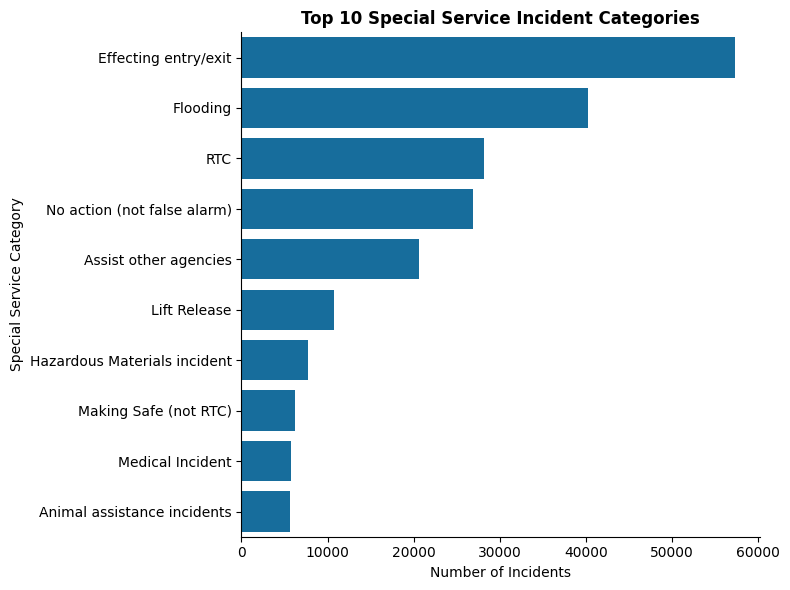

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(
            data=top10_special_service_counts,
            x="IncidentCount",
            y="SpecialServiceType",
            order=top10_special_service_counts["SpecialServiceType"],
            color=sns.color_palette("colorblind")[0]
            )

plt.title( "Top 10 Special Service Incident Categories", weight="bold")
plt.xlabel("Number of Incidents")
plt.ylabel("Special Service Category")

sns.despine()
plt.tight_layout()
plt.show()

 #### 4. Average First Pump Attendance Time by Month and Incident Type

Average response times are used to analyse overall temporal trends and seasonal variation across incident types.

In [ ]:
# Average first pump attendance time by month and incident type (minutes)
avg_firstpump_attendance_by_type = (
                            incidents_mobilisation
                            .groupby(["CallMonth", "IncidentGroup"])["FirstPumpArriving_AttendanceTime"]
                            .mean()
                            .div(60)  # convert seconds to minutes
                            .reset_index(name="AvgFirstPumpMinutes")
                             )

# Average first pump attendance time by month (all incidents)
avg_firstpump_attendance_total = (
                           incidents_mobilisation
                           .groupby("CallMonth")["FirstPumpArriving_AttendanceTime"]
                           .mean()
                           .div(60)
                           .reset_index(name="AvgFirstPumpMinutes")
                           )

# Label totals
avg_firstpump_attendance_total["IncidentGroup"] = "All Incidents"

# Combine into  into one long format table
avg_firstpump_attendance_long = pd.concat(
                                        [avg_firstpump_attendance_by_type, avg_firstpump_attendance_total],
                                        ignore_index=True
                                          )

/tmp/ipython-input-617480390.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["CallMonth", "IncidentGroup"])["FirstPumpArriving_AttendanceTime"]


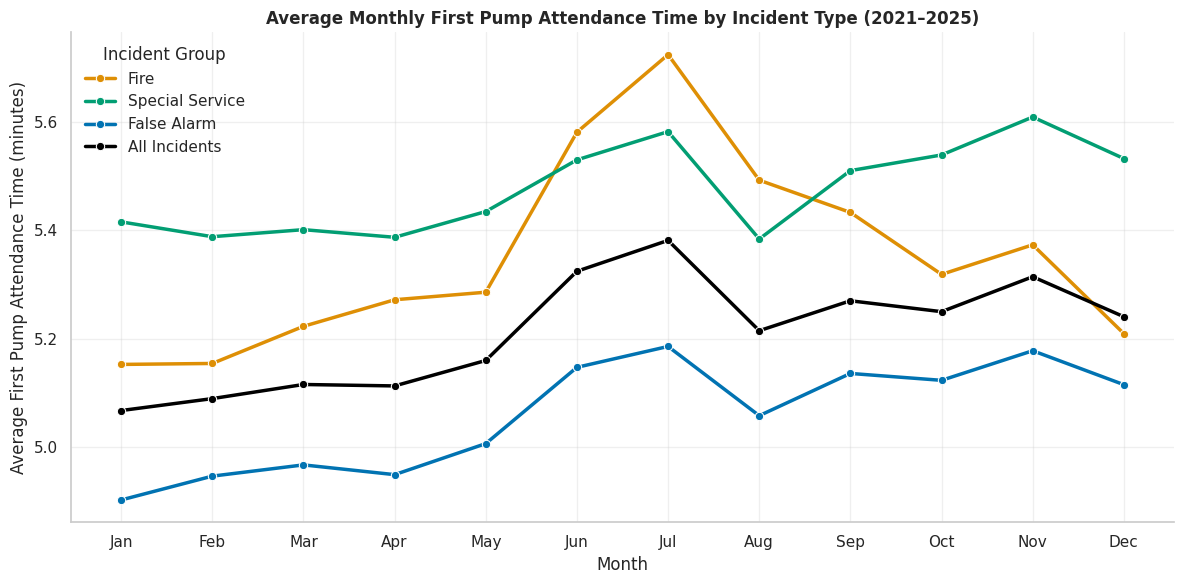

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {
          "All Incidents": "black",
          "False Alarm": sns.color_palette("colorblind")[0],
          "Fire": sns.color_palette("colorblind")[1],
          "Special Service": sns.color_palette("colorblind")[2],
           }

hue_order = [
            "Fire",
            "Special Service",
            "False Alarm",
            "All Incidents"
             ]

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.lineplot(
            data=avg_firstpump_attendance_long,
            x="CallMonth",
            y="AvgFirstPumpMinutes",
            hue="IncidentGroup",
            hue_order=hue_order,
            palette=palette,
            linewidth=2.5,
            marker="o"
             )

plt.title( "Average Monthly First Pump Attendance Time by Incident Type (2021–2025)", weight="bold")

plt.xlabel("Month")
plt.ylabel("Average First Pump Attendance Time (minutes)")

plt.xticks(range(1, 13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.grid(axis="y", alpha=0.3)
plt.grid(axis="x", alpha=0.3)

plt.legend(title="Incident Group", frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

The average first pump attendance time shows a seasonal pattern for the three different incident types. From January to summer, response times increase, peaking in July, before improving again toward the end of the year.

Fire incidents have the longest average attendance times during the summer months (Jun - Aug), which could be caused be the higher number of total incidents in this months (see Monthly Incident Trends by Incident Type (2021–2025))

Outside the summer peak, Special Service incidents show the longest average response times compared to the other incident types, indicating that they may be less time critical and therefore may not be prioritised.

False alarms have the lowest average attendance times throughout the year, indicating faster turnout and travel times.

Overall, response times across all incident types remain relatively stable and close to five to five and a half minutes, with only a slight variation throughout the year.

**The London Fire Brigade aims for the first pump to arrive within an average of six minutes and a second fire engine within an average of eight minutes** (https://www.london-fire.gov.uk/media/6686/crmp-metrics-30-may.pdf)

The average first pump attendance time remains below the 6 minute goal across all months and incident types.

#### 5. First vs. Second Pump Attendance Time Comparison by Incident Type

In [ ]:
# Select first and second pump attendance times with incident group
attendance_times = incidents_mobilisation[
    ["IncidentGroup", "FirstPumpArriving_AttendanceTime", "SecondPumpArriving_AttendanceTime"]
                                          ]

# Convert to long format
attendance_times_melted = attendance_times.melt(
                                               id_vars="IncidentGroup",
                                               var_name="Pump Type",
                                               value_name="AttendanceTimeMinutes"
                                                )

# Convert seconds to minutes
attendance_times_melted["AttendanceTimeMinutes"] /= 60

#First- and Second-Pump labels
attendance_times_melted["Pump Type"] = (
                                       attendance_times_melted["Pump Type"]
                                       .replace({
                                       "FirstPumpArriving_AttendanceTime": "First Pump",
                                       "SecondPumpArriving_AttendanceTime": "Second Pump"
                                       })
                                       )

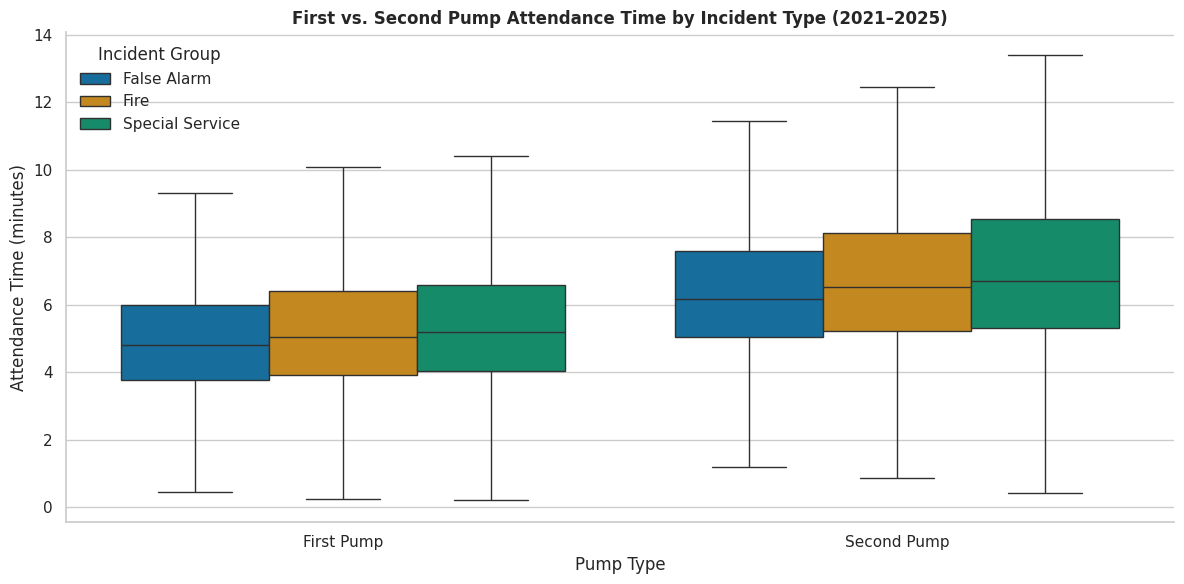

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(
           data=attendance_times_melted,
           x="Pump Type",
           y="AttendanceTimeMinutes",
           hue="IncidentGroup",
           palette="colorblind",
           showfliers=False
            )

plt.title("First vs. Second Pump Attendance Time by Incident Type (2021–2025)", weight="bold")
plt.xlabel("Pump Type")
plt.ylabel("Attendance Time (minutes)")

plt.legend(title="Incident Group", frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

For the first pump, median attendance times stay below the 6 minute target across all incident types, which shows that the primary response target is generally being met. However, a number of incidents exceed the target, particularly for fire and special service responses.

For the second pump, median response times are below the 8 minute target. But similar to the first pump attendance time, a number of incidents exceed the target, particularly for fire and special service responses.

False alarms get the fastest responses, while fire and special service incidents show more variability.

Overall, targets are met on average, but performance varies.

#### 6. Response Time Component Distributions



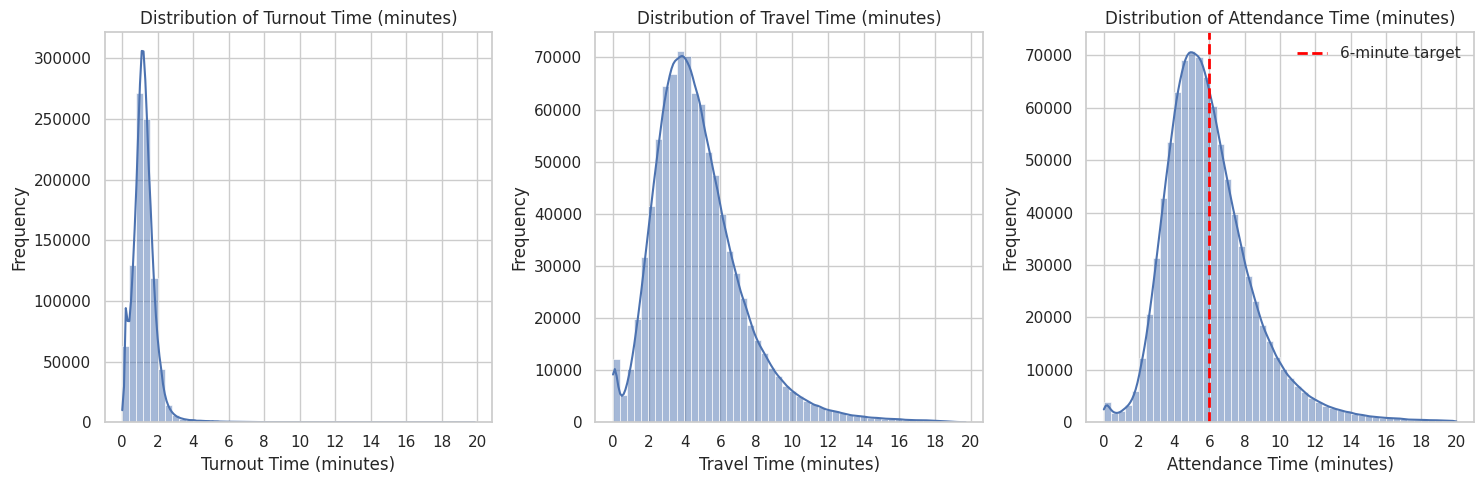

In [ ]:
#Columns to plot (in seconds)
columns_to_plot = [
                  "TurnoutTimeSeconds",
                  "TravelTimeSeconds",
                  "AttendanceTimeSeconds"
                    ]

# Labels for titles and axes
labels = {
         "TurnoutTimeSeconds": "Turnout Time (minutes)",
         "TravelTimeSeconds": "Travel Time (minutes)",
         "AttendanceTimeSeconds": "Attendance Time (minutes)"
          }

plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)

    # Convert seconds to minutes for plotting
    data_minutes = mobilisation[column].dropna() / 60

    sns.histplot(data_minutes, bins=50, kde=True)

    plt.title(f"Distribution of {labels[column]}")
    plt.xlabel(labels[column])
    plt.ylabel("Frequency")

    # Set x-axis ticks every 2 minutes
    plt.xticks(range(0, 22, 2))

    # 6-minute target for first pump arrival
    if column == "AttendanceTimeSeconds":
      plt.axvline(
            x=6,
            color="red",
            linestyle="--",
            linewidth=2,
            label="6-minute target"
            )

plt.legend(frameon=False)

plt.tight_layout()
plt.show()

Turnout times cluster at around a minute, which suggests that station mobilisation is relatively stable. Travel times show more spread and a long right tail, indicating variability in distance and traffic conditions. Attendance time combines both, resulting in a similar but slightly broader distribution
** While most responses are within the 6-minute target, the right skewed tail indicates that delays occur for a number of incidents.**

#### 7. First Pump Response Performance Against the 6-Minute Target



In [ ]:
# Identify incidents where the first pump arrived within the 6-minute response target
incidents_mobilisation["FirstPump_Within_6min"] = (incidents_mobilisation["FirstPumpArriving_AttendanceTime"] <= 360)

#Calculate the rate of incidents meeting the response target by incident type
first_pump_within_6min_rate_by_type = (
                                      incidents_mobilisation
                                      .groupby("IncidentGroup", observed=True)["FirstPump_Within_6min"]
                                      .mean()
                                      .mul(100)
                                      .round(1)
                                      .reset_index(name="FirstPump_Within6min_Percent")
                                       )

print("\nFirst Pump Compliance within 6 minutes target by Incident Type")
display(first_pump_within_6min_rate_by_type.style.format({"FirstPump_Within6min_Percent": "{:.1f}%"}))

#Calculate the rate of incidents meeting the response target by borough
first_pump_within_6min_rate_by_borough = (
                                          incidents_mobilisation
                                          .groupby("IncGeo_BoroughName", observed=True)["FirstPump_Within_6min"]
                                          .mean()
                                          .mul(100)
                                          .round(1)
                                          .reset_index(name="FirstPump_Within6min_Percent")
                                          .sort_values("FirstPump_Within6min_Percent", ascending=False)
                                           )


#Select TOP 10 boroughs (fastest response time)
df_top10_boroughs_first_pump_6min = (
                                    first_pump_within_6min_rate_by_borough
                                    .head(10)
                                    .reset_index(drop=True)
                                     )

df_top10_boroughs_first_pump_6min.index += 1

print("\nTop10 Boroughs by first pump compliance within 6min")
display(df_top10_boroughs_first_pump_6min.style.format({"FirstPump_Within6min_Percent": "{:.1f}%"}))


First Pump Compliance within 6 minutes target by Incident Type


,IncidentGroup,FirstPump_Within6min_Percent
0,False Alarm,75.0%
1,Fire,68.9%
2,Special Service,66.1%



Top10 Boroughs by first pump compliance within 6min


,IncGeo_BoroughName,FirstPump_Within6min_Percent
1,KENSINGTON AND CHELSEA,84.8%
2,CITY OF LONDON,83.5%
3,LAMBETH,83.2%
4,TOWER HAMLETS,82.7%
5,HAMMERSMITH AND FULHAM,80.5%
6,ISLINGTON,80.4%
7,SOUTHWARK,79.5%
8,HACKNEY,78.7%
9,WESTMINSTER,78.0%
10,WANDSWORTH,76.5%


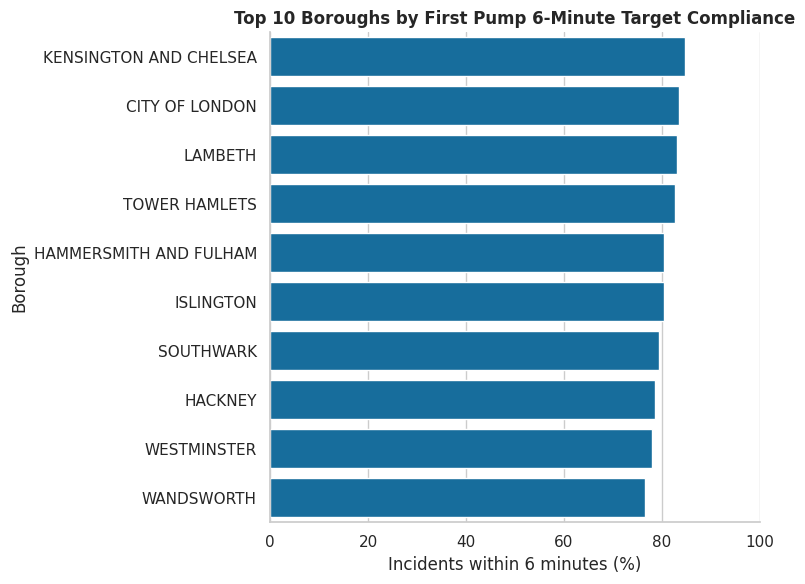

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=df_top10_boroughs_first_pump_6min,
    x="FirstPump_Within6min_Percent",
    y="IncGeo_BoroughName",
    order=df_top10_boroughs_first_pump_6min["IncGeo_BoroughName"],
    color=sns.color_palette("colorblind")[0]
)

plt.title(
    "Top 10 Boroughs by First Pump 6-Minute Target Compliance",
    weight="bold"
)

plt.xlabel("Incidents within 6 minutes (%)")
plt.ylabel("Borough")
plt.xlim(0, 100)

sns.despine()
plt.tight_layout()
plt.show()

#### 8. Average Attendance Time by Delay Code and Frequency of Delay Categories

##### Average Attendance Time by Delay Code

In [ ]:
# Calculate the average attendance time per delay code and convert seconds to minutes
avg_attendance_time_delay = (
                            mobilisation
                            .groupby("DelayCode_Description")["AttendanceTimeSeconds"]
                            .mean()
                            .div(60) # convert seconds to minutes
                            .reset_index(name="AvgAttendanceTimeMinutes")
                            .sort_values("AvgAttendanceTimeMinutes", ascending=False) # Order delays from longest to shortest
                             )

# Use the sorted delay codes for plot order
delay_order = avg_attendance_time_delay["DelayCode_Description"]

avg_attendance_time_delay

/tmp/ipython-input-1861991417.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("DelayCode_Description")["AttendanceTimeSeconds"]


,DelayCode_Description,AvgAttendanceTimeMinutes
0,Address incomplete/wrong,9.591846
2,Arrived but held up - Other reason,9.294968
1,Appliance/Equipment defect,9.253063
4,Mob/Radio problems when mobilised,9.251907
9,Weather conditions,8.496308
8,"Traffic, roadworks, etc",8.480787
6,On outside duty when mobilised,8.438903
5,Not held up,8.264213
3,At drills when mobilised,8.240194
7,Traffic calming measures,8.195655


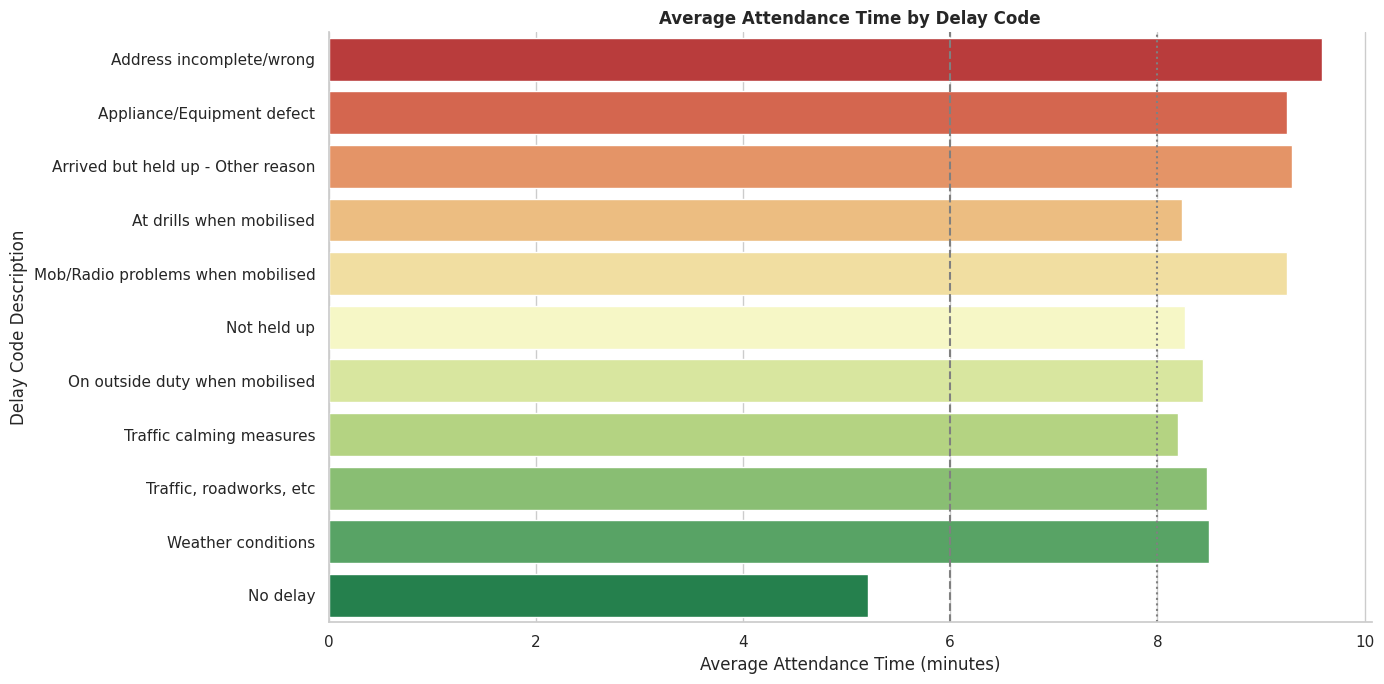

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))

sns.barplot(
    data=avg_attendance_time_delay,
    x="AvgAttendanceTimeMinutes",
    y="DelayCode_Description",
    hue="DelayCode_Description",
    palette="RdYlGn",
    legend=False                   # green = short; red = long
            )

plt.title(
    "Average Attendance Time by Delay Code",
    weight="bold"
          )

plt.xlabel("Average Attendance Time (minutes)")
plt.ylabel("Delay Code Description")

# Add reference lines for LFB response time targets
plt.axvline(
            x=6,
            color="grey",
            linestyle="--",
            linewidth=1.5,
            label="First pump target (6 min)"
            )

plt.axvline(
            x=8,
            color="grey",
            linestyle=":",
            linewidth=1.5,
            label="Second pump target (8 min)"
            )

sns.despine()
plt.tight_layout()
plt.show();

Average attendance times vary depending on the delay category.

Delays caused by incorrect address information, equipment defects, and mobilisation or communication problems have the longest attendance times.

Weather conditions, traffic and roadworks, traffic calming measures, and occasions when crews were on outside duty or at drills when they got mobilised have moderate delays.

When compared to the London Fire Brigade’s response time targets, only incidents with no recorded delay achieve an average attendance time below the 6 minute goal.  All other delay categories exceed the 6 minute target for first appliance arrival. Most delay categories even exceed the 8 minutes aimed for the second pump to arrive.

**But To better interpret the impact of these delays, it is necessary to take into account how often each delay category occurs**



##### Frequency of Delay Categories

In [ ]:
# Count how often each delay category occurs
delay_counts = (
               mobilisation
               .groupby("DelayCode_Description")["AttendanceTimeSeconds"]
               .count()
               .reset_index(name="IncidentCount")
               .sort_values("IncidentCount", ascending=False) # Order delays from longest to shortest
                )

# Use the sorted delay codes for plot order
delay_order = delay_counts["DelayCode_Description"] # Order delays from longest to shortest

# Calculate percentages of each delay category
delay_counts["Percentage (%)"] = (delay_counts["IncidentCount"] / delay_counts["IncidentCount"].sum() * 100).round(2)

delay_counts

/tmp/ipython-input-632399837.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("DelayCode_Description")["AttendanceTimeSeconds"]


,DelayCode_Description,IncidentCount,Percentage (%)
10,No delay,675735,74.43
5,Not held up,145193,15.99
8,"Traffic, roadworks, etc",49852,5.49
7,Traffic calming measures,17456,1.92
0,Address incomplete/wrong,9024,0.99
2,Arrived but held up - Other reason,2676,0.29
6,On outside duty when mobilised,2319,0.26
4,Mob/Radio problems when mobilised,2211,0.24
9,Weather conditions,1747,0.19
1,Appliance/Equipment defect,1110,0.12


/tmp/ipython-input-3821436939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


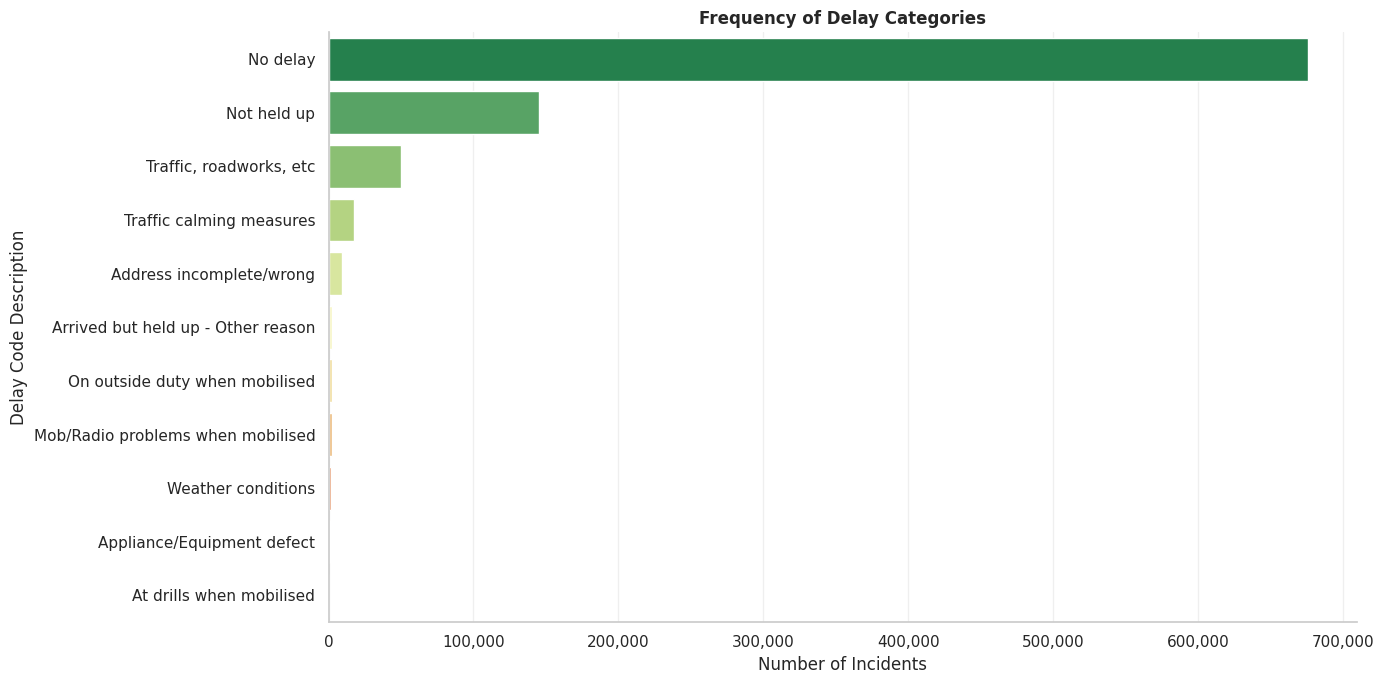

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))

sns.barplot(
           data=delay_counts,
           x="IncidentCount",
           y="DelayCode_Description",
           order=delay_order,        #  Order delays from longest to shortest
           palette="RdYlGn_r"
            )

plt.title("Frequency of Delay Categories", weight="bold")

plt.xlabel("Number of Incidents")

plt.xticks(
          range(0, 700001, 100000),
          [f"{x:,}" for x in range(0, 700001, 100000)]
           )

plt.grid(axis="x", alpha=0.3)

plt.ylabel("Delay Code Description")

sns.despine()
plt.tight_layout()
plt.show()

The Table and the plot show that the vast majority of mobilisations have no delay (~74%). Another 16% of mobilisations are categorised as "Not held up".   Then there are less frequent but relevant delays related to traffic (“Traffic, roadworks, etc” and “Traffic calming measures”). Rare delays linked to the longest average attendance times include "Address incomplete/wrong", "Arrived but held up", "Appliance/Equipment defect", "Mob/Radio problems when mobilised" and "Weather conditions".

**	For the majority of incidents (74%), the first appliance goal is met (on avarage). However, this is achieved only when no delay occurs **

#### 9. Boroughs by Incident Count and Incident Type

In [ ]:
# Count unique incidents by borough and incident type
borough_incidents_by_type = (
                            incidents_mobilisation
                            .groupby(["IncGeo_BoroughName", "IncidentGroup"], observed=True)["IncidentNumber"]
                            .nunique()
                            .reset_index(name="IncidentCount")
                             )

# Identify top 10 boroughs by total incident count
top_10_boroughs = (
                  borough_incidents_by_type
                  .groupby("IncGeo_BoroughName", observed=True)["IncidentCount"]
                  .sum()
                  .sort_values(ascending=False)
                  .head(10)
                  .index
                   )

# Filter to top 10 boroughs only
borough_incidents_top10 = borough_incidents_by_type[
    borough_incidents_by_type["IncGeo_BoroughName"].isin(top_10_boroughs)
]

In [ ]:
borough_pivot = (
                 borough_incidents_top10
                 .pivot(
                    index="IncGeo_BoroughName",
                    columns="IncidentGroup",
                    values="IncidentCount"
                 )
                 .fillna(0)
                 .loc[top_10_boroughs]  # keep order
                 )

borough_percent = (
                  borough_pivot
                  .div(borough_pivot.sum(axis=1), axis=0)
                  .mul(100)
                  .round(1)
                    )

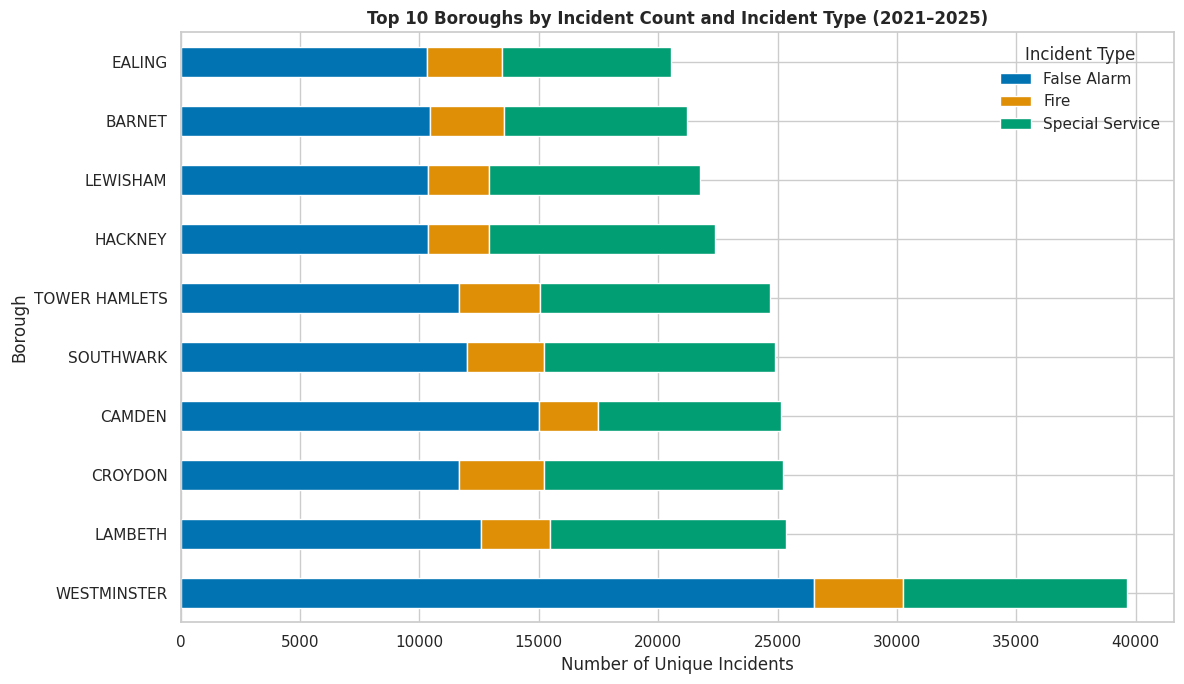

In [ ]:
palette = {
          "False Alarm": sns.color_palette("colorblind")[0],
          "Fire": sns.color_palette("colorblind")[1],
          "Special Service": sns.color_palette("colorblind")[2],
           }

borough_pivot.plot(
                  kind="barh",
                  stacked=True,
                  figsize=(12, 7),
                  color=[palette[col] for col in borough_pivot.columns]
                   )

plt.title("Top 10 Boroughs by Incident Count and Incident Type (2021–2025)", weight="bold")
plt.xlabel("Number of Unique Incidents")
plt.ylabel("Borough")

plt.legend(title="Incident Type", frameon=False)
plt.tight_layout()
plt.show()

Across the top 10 boroughs, false alarms make up the largest number of incidents, with special service showing the second largest number of recorded incidents. Fire incidents are a smaller component across all boroughs.

Westminster stands out with a particularly large false-alarm volume compared to the other boroughs. This may be related to:


*   density of offices, government buildings, embassies, shopping areas
*   high-security buildings (e.g. government buildings and embassies) where alarms are more likely to occur.
*   high number of people present both during working hours and at night (Tourism, nightlife, events) compared to other boroughs, increasing the chances of false alarms

To better understand the composition behind the incident counts, the tables below shows incident counts and percentages for each borough:

In [ ]:
print("Borough Pivot")
display(borough_pivot)

print("\n")

print("Borough Percent")
display(borough_percent.style.format("{:.1f}%"))

Borough Pivot


IncidentGroup,False Alarm,Fire,Special Service
IncGeo_BoroughName,,,
WESTMINSTER,26506,3753,9361
LAMBETH,12572,2904,9862
CROYDON,11674,3562,9989
CAMDEN,15021,2440,7689
SOUTHWARK,12009,3213,9681
TOWER HAMLETS,11640,3408,9629
HACKNEY,10376,2554,9430
LEWISHAM,10344,2570,8821
BARNET,10458,3092,7650




Borough Percent


IncidentGroup,False Alarm,Fire,Special Service
IncGeo_BoroughName,,,
WESTMINSTER,66.9%,9.5%,23.6%
LAMBETH,49.6%,11.5%,38.9%
CROYDON,46.3%,14.1%,39.6%
CAMDEN,59.7%,9.7%,30.6%
SOUTHWARK,48.2%,12.9%,38.9%
TOWER HAMLETS,47.2%,13.8%,39.0%
HACKNEY,46.4%,11.4%,42.2%
LEWISHAM,47.6%,11.8%,40.6%
BARNET,49.3%,14.6%,36.1%


#### 10. First Pump Response Time by Borough (Median)


Median response times are used at borough level to reduce the influence of extreme delays and better represent the typical response experienced within each borough.

##### Response Performance in Fastest Boroughs (Median First Pump Time)


In [ ]:
# Top 10 fastest boroughs by median first pump attendance time
top10_fastest_boroughs_response_time = (
                                        incidents_mobilisation
                                        .groupby("IncGeo_BoroughName", observed=True)["FirstPumpArriving_AttendanceTime"]
                                        .median()
                                        .div(60)
                                        .sort_values(ascending=True)
                                        .head(10)
                                        .reset_index(name="MedianFirstPump_in_Minutes")
                                         )

top10_fastest_boroughs_response_time

,IncGeo_BoroughName,MedianFirstPump_in_Minutes
0,KENSINGTON AND CHELSEA,4.183333
1,LAMBETH,4.333333
2,TOWER HAMLETS,4.366667
3,CITY OF LONDON,4.416667
4,ISLINGTON,4.650000
5,HAMMERSMITH AND FULHAM,4.650000
6,SOUTHWARK,4.650000
7,LEWISHAM,4.666667
8,WALTHAM FOREST,4.700000
9,WANDSWORTH,4.716667


/tmp/ipython-input-2465257361.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


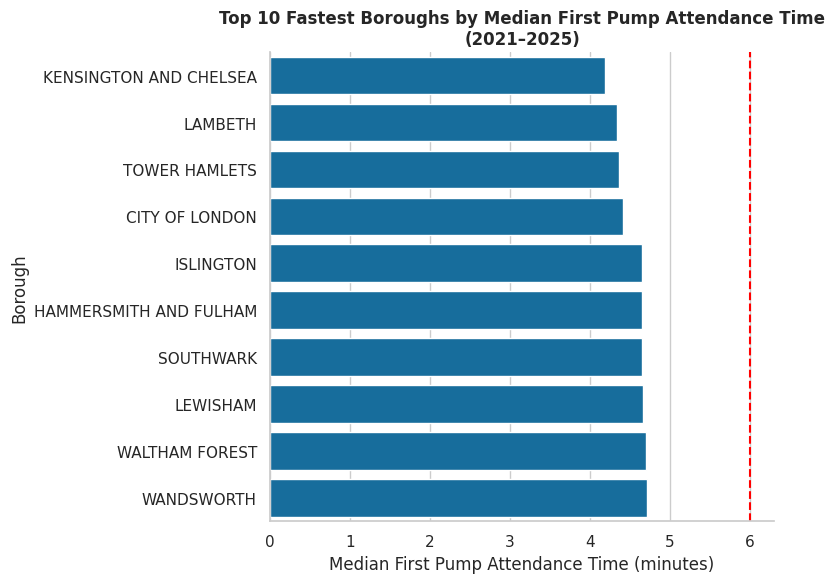

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(
            data=top10_fastest_boroughs_response_time,
            x="MedianFirstPump_in_Minutes",
            y="IncGeo_BoroughName",
            order=top10_fastest_boroughs_response_time["IncGeo_BoroughName"],
            color=sns.color_palette("colorblind")[0]
            )

# LFB target line (6 minutes)
plt.axvline(
            x=6,
            color="red",
            linestyle="--",
            linewidth=1.5,
             )

plt.title("Top 10 Fastest Boroughs by Median First Pump Attendance Time\n(2021–2025)", weight="bold")

plt.xlabel("Median First Pump Attendance Time (minutes)")
plt.ylabel("Borough")

plt.legend(frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

##### Response Performance in Busiest Boroughs (Median First Pump Time)

In [ ]:
# Top 10 busiest boroughs by Number of Incidents
top10_boroughs = (
                  incidents_mobilisation
                  .groupby("IncGeo_BoroughName", observed=True)["IncidentNumber"]
                  .nunique()
                  .sort_values(ascending=False)
                  .head(10)
                  .index
                  )

# Median first pump response time in busiest boroughs
top10_busiest_boroughs_response_time = (
                              incidents_mobilisation
                              .loc[incidents_mobilisation["IncGeo_BoroughName"].isin(top10_boroughs)]
                              .groupby("IncGeo_BoroughName", observed=True)["FirstPumpArriving_AttendanceTime"]
                              .median()
                              .div(60)  # seconds → minutes
                              .sort_values(ascending=True)
                              .reset_index(name="MedianFirstPump_in_Minutes")
                              )

top10_busiest_boroughs_response_time

,IncGeo_BoroughName,MedianFirstPump_in_Minutes
0,LAMBETH,4.333333
1,TOWER HAMLETS,4.366667
2,SOUTHWARK,4.650000
3,LEWISHAM,4.666667
4,WESTMINSTER,4.750000
5,HACKNEY,4.766667
6,CROYDON,4.766667
7,CAMDEN,4.766667
8,EALING,5.200000
9,BARNET,5.416667


/tmp/ipython-input-436204229.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


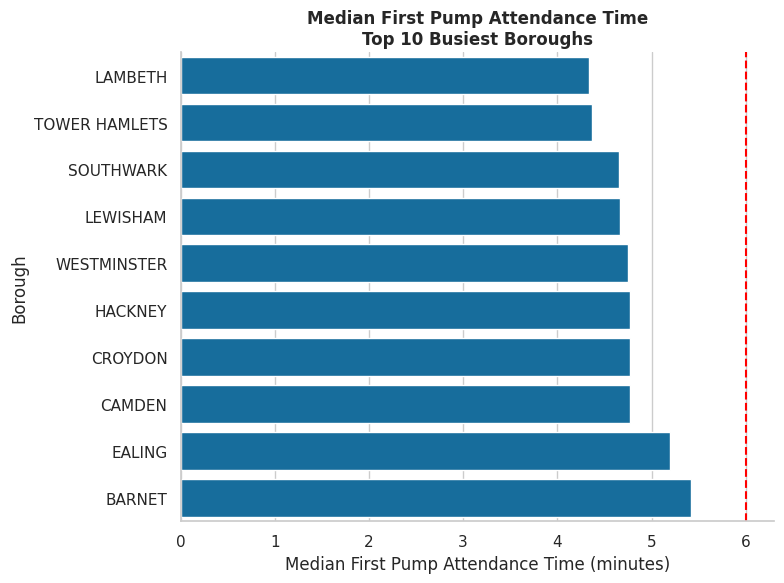

In [ ]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=top10_busiest_boroughs_response_time,
    x="MedianFirstPump_in_Minutes",
    y="IncGeo_BoroughName",
    order=top10_busiest_boroughs_response_time["IncGeo_BoroughName"],
    color=sns.color_palette("colorblind")[0]
)

# LFB first pump target
plt.axvline(
    x=6,
    color="red",
    linestyle="--",
    linewidth=1.5,
)

plt.title(
    "Median First Pump Attendance Time\nTop 10 Busiest Boroughs",
    weight="bold"
)

plt.xlabel("Median First Pump Attendance Time (minutes)")
plt.ylabel("Borough")

plt.legend(frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

## **Step 4: Export Analytical Dataset for Streamlit**

In [ ]:
df = incidents_mobilisation

columns_needed = [
                  "IncidentNumber",
                  "CallDate",
                  "HourOfCall",
                  "IncidentGroup",
                  "SpecialServiceType",
                  "FirstPumpArriving_AttendanceTime",
                  "SecondPumpArriving_AttendanceTime",
                  "NumPumpsAttending",
                  "IncGeo_BoroughName",
                  "TurnoutTimeSeconds",
                  "TravelTimeSeconds",
                  "DelayCode_Description",
                  "IncidentStationGround",
                  "DeployedFromLocation",
                  "DeployedFromStation_Name",
                  "PumpOrder"
                  ]

df_streamlit = df[columns_needed].copy()

# Memory optimisation:
# Downcast numeric columns (int64 → nullable Int16 / float32) to reduce memory usage.
# Nullable integers retain NA support with minimal additional overhead.
# Downcasting significantly reduces RAM usage for the large project datasets (~950k rows).

df_streamlit["FirstPumpArriving_AttendanceTime"] = df_streamlit["FirstPumpArriving_AttendanceTime"].astype("Int16")
df_streamlit["TurnoutTimeSeconds"] = df_streamlit["TurnoutTimeSeconds"].astype("Int16")
df_streamlit["TravelTimeSeconds"] = df_streamlit["TravelTimeSeconds"].astype("Int16")

df_streamlit["SecondPumpArriving_AttendanceTime"] = df_streamlit["SecondPumpArriving_AttendanceTime"].astype("float32")

df_streamlit["NumPumpsAttending"] = df_streamlit["NumPumpsAttending"].astype("Int8")

# Memory Check
print("Memory usage (MB):", df_streamlit.memory_usage(deep=True).sum() / 1e6)

# Export (nur optimierte Version!)
df_streamlit.to_parquet("lfb_streamlit.parquet",index=False,compression="snappy")

Memory usage (MB): 87.51407
